# Lead Scoring for Business Growth

## Introduction: Understanding Leads on Business
Before getting into this project there are several things you need to know which I will explain briefly below.

🚀 What is a lead?
A lead is a potential customer who has shown initial interest in your product or service. This could be someone who has visited your product website, signed up for yout email list, or discovered your product or service through social media.

🚀 What is a prospect?
A prospect is a lead who has moved deeper into the sales funnel. They are actively considering your product or service and are evaluating whether it meets their needs. As prospects move closer to making a purchase, nurturing relationships with them becomes critical. Provide valuable and relevant information to help prospects make a decision.

In addition to leads and prospects, the business world is also closely associated with the term customer. They are individuals or companies who have converted by making a purchase and are actively using your product or service.

By nurturing leads into prospects and nurturing strong relationships with customers, businesses can thrive in today’s competitive marketplace.


🚀 What is Leads Scoring?

Lead scoring is the process of assigning a value to each prospect you acquire for your business. This system aims to identify the level of interest and readiness to buy from the prospect. Lead scoring helps the Sales team prioritize the prospects who are most likely to buy the products or services you offer. Basically, this assessment is based on engagement and behavior factors.

Engagement means how actively the prospect interacts with the marketing campaign, such as opening emails, downloading content, attending webinars, or filling out forms. The higher the engagement, the more likely they are to be interested in your product/service. While behavior relates to whether the prospect asks for product details, looks for a demo or signs up for a free trial. These actions indicate a deeper interest than just visiting your website.

Leads with high scores are considered more ready to be followed up by the Sales team, while Leads with low scores may still need further nurturing or education from the marketing team.

Lead scoring Models are influenced by various factors, such as Demographics information, Company information, Online behavior, Email engagement, Social engagement, and Spam detection.

Lead scoring will help you determine what stage a prospect is at in the sales cycle, this relates to how likely the prospect is to convert and helps you make more informed decisions about whether or not you need to take further action.

![score](image-1.png)

There are several methods that can be used to perform Lead Scoring, including:
- Rule-Based Scoring → Leads are scored based on manual rules (for example, each website visit = +5 points).
- Machine Learning-Based Scoring → Predictive models are used to score leads based on patterns in historical data.

In this project, we use Machine Learning (Random Forest, Logistic Regression, etc.) to make predictions based on historical patterns of customer conversions.



# Framework Analysis

## Business Problem
Education Company is a business that sells online courses to industry professionals. Every day, many individuals interested in their courses visit the company's website to search for information, fill out forms, or watch videos. When someone submits a form with their email or phone number, they are classified as a lead. The company also obtains leads from previous referrals. Once a lead is acquired, the sales team initiates engagement by reaching out through phone calls or emails. While some of these leads eventually convert into customers, the majority do not.

To connect with potential customers, the company has a dedicated sales team responsible for marketing activities. The HDA team employs various approaches to engage with leads, explain the courses, and address any questions they may have. The sales team has a KPI target to achieve a conversion rate of 80%. However, despite having a large number of website visitors, the team faces challenges in converting leads. Currently, only 30% of leads successfully turn into paying customers, far below the expected 80% target set by the sales team.

Given the high volume of incoming leads, the sales team struggles to effectively prioritize potential customers, resulting in wasted time and resources pursuing leads with no serious interest in their products. Without a clear strategy to evaluate and prioritize high-quality leads, the effectiveness of marketing and sales efforts diminishes, ultimately reducing the company's profitability.

## Analysis Objective 
The objective of this analysis is to develop a Lead Scoring model that can identify and prioritize leads with a high probability of conversion, enabling the sales team to focus on the most promising prospects. This analysis aims to:

✅ Increase the lead conversion rate from 30% to the target of 80% set by the sales team.

✅ Optimize the allocation of sales team resources, ensuring they concentrate on high-potential leads (those with a high lead score) rather than spending time on low-quality prospects.

✅ Enhance marketing efficiency by providing deeper insights into potential customers' behavioral patterns, allowing for more targeted and effective marketing strategies.

✅ Determine the probability score for each lead, enabling more precise and data-driven business decision-making.

## Key Questions
To achieve the objectives of this analysis, several key questions need to be addressed in the Lead Scoring process:

🔹 What factors influence a lead's likelihood of conversion?

🔹 What behavioral patterns do high-converting customers exhibit?

🔹 Do specific attributes—such as lead source, visit duration, or website engagement—contribute to conversion probability?

🔹 How can predictive modeling provide an accurate lead score based on past conversion patterns?

🔹 What are the best strategies for the sales team to leverage Lead Scoring to improve efficiency?


# Prepare Work Environment

# Library

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, roc_auc_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import uniform

# Data Collection

In [113]:
#wanna see field and record
#pd.set_option('display.max_columns',125)
#pd.set_option('display.max_rows',50)
# showing all columns
#pd.set_option('display.max_columns', None)

In [114]:
#import data 
df = pd.read_excel(r"C:\Users\User\Downloads\Leads_dummy data.xlsx")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [115]:
print(df.info())
print("Number of rows and columns :", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#statistical distribution of the dataset
print(df.describe())

# statistical distribution of categorical variables
print(df.describe(include='O'))

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

#### Action plan:
1. Check and handling duplicates.
2. Check and handling missing values.
3. Identify column contents and drop useless columns.
4. Identify numeric, category, and binary columns.
5. Handling Outliers.

# Data Cleaning

This process aims to clean and improve raw data to make it more accurate and consistent. It includes removing missing value or invalid data, handling duplicates, addressing format inconsistancies, and removing outliers. The main goal is to make sure that the data entering the model does not contain errors that can reduce model performance.

There is a default value "Select" that may result from a dropdown/ selection made by the user when they fill out the form.
Therefore, replacing "Select" with NaN

In [117]:
#replacing 'Select' with NaN
df.replace({'Select': np.nan}, inplace = True)

## Check Duplicate

In [118]:
#Check for duplicate values based on "Lead Number" as a unique value
df.duplicated(subset='Lead Number').any()

np.False_

## Check Missing Value

In [119]:
#Checking Missing Values
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False),2)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Missing Value', 'Percent Missing Value'])
missing_data

,Missing Value,Percent Missing Value
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Score,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [120]:
#drop columns with >= 40% missing values
missing_cols = [col for col in df.columns if percent_missing[col]>=40]
print("Columns with >= 40% missing values:", missing_cols)
df.drop(missing_cols, inplace=True, axis=1)


Columns with >= 40% missing values: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [121]:
#look at df that has missing value > 0
x = (df.isna().sum()/df.shape[0]*100)
x[x > 0].sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

## Handling missing values ​​and initial feature engineering
Identify columns that have a NaN value

### 1. City

In [122]:
#City
#counting the occurrences of each unique value 
df['City'].value_counts(dropna = False, normalize = True).mul(100).round(2)

City
NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_28896\1416406133.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna('Mumbai', inplace = True)


<Axes: xlabel='City'>

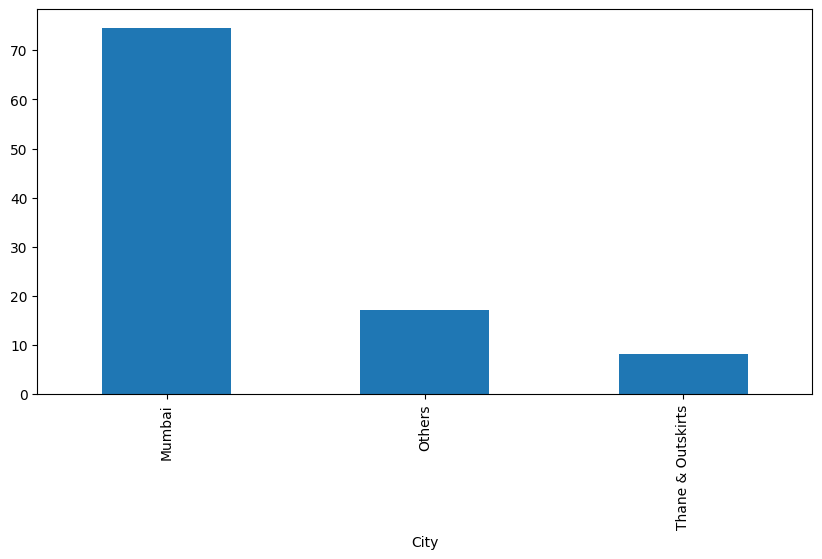

In [123]:
#replace value 'Other ...' of city to 'Others' and fill in the NaN value using the mode value in 'City'
df['City'] = df['City'].replace(['Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities',
                                  'Tier II Cities'], 'Others').fillna(df['City'].mode()[0])
#Replace the value 'NaN' with 'Mumbai' (Mode of the value)
df['City'].fillna('Mumbai', inplace = True)
#Visualize
df['City'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])

### 2. Specialization

In [124]:
#Specialization
#counting the occurrences of each unique value 
vc_sp = df['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2)
vc_sp

Specialization
NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: proportion, dtype: float64

#### Action Plan:
- Group "E-COMMERCE" and "E-Business" into a single category called "E-commerce."
- Group "Banking, Investment And Insurance" with "Finance Management."
- Group "Media and Advertising" with "Marketing Management."
- NaN in 'Specialization' is the level 'Select Specialization' which means the customer did not selected this option while filling the form.

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2911889499.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Specialization'].fillna('Others', inplace = True)


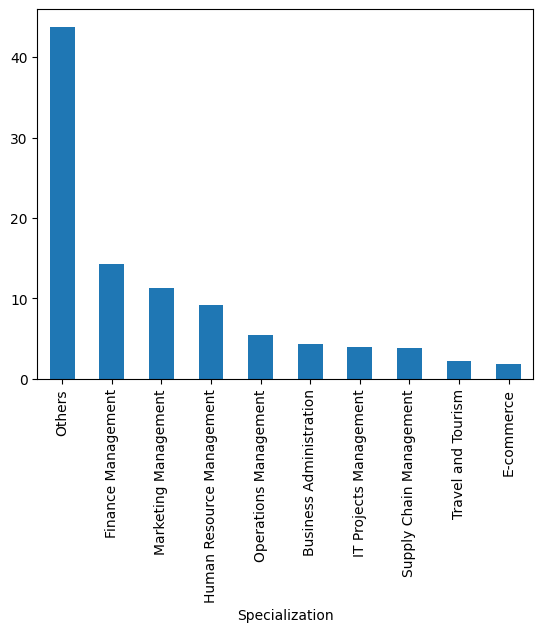

In [125]:
#Replacing 'E-COMMERCE', 'E-Business' into 'E-commerce'.
df['Specialization'] = df['Specialization'].replace(['E-COMMERCE', 'E-Business'],'E-commerce')
#Replacing 'Banking, Investment And Insurance' into 'Finance Management'.
df['Specialization'] = df['Specialization'].replace(['Banking, Investment And Insurance'], 'Finance Management')
#Replacing 'Media and Advertising' into 'Marketing Management'.
df['Specialization'] = df['Specialization'].replace('Media and Advertising', 'Marketing Management')

#NaN in 'Specialization' is the level 'Select Specialization' which means the customer did not selected this option while filling the form.
#Replacing NaN's with 'Others' as these values may correspond to students/freshers
df['Specialization'].fillna('Others', inplace = True)
#Create an 'Others' that are counts < 2
df['Specialization'] = df['Specialization'].replace(list(vc_sp[vc_sp<2].index), 'Others')
df['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot.bar()
plt.show()

### 3. Tags

In [126]:
#Tags is the current status of the lead. 
#It counts the occurrences of each unique value in the 'Tags' column.
df['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Tags
NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                

#### Insights and Action Plan:
- Group 'invalid number', 'wrong number given', 'number not provided' , and 'opp hangup' into a category called 'Not Contacted'.
- Group 'Interested  in full time MBA', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Shall take in the next coming month', and 'Still Thinking' into a category called 'Showed Interest'.
- Group 'Lost to EINS', 'in touch with EINS', 'Want to take admission but has financial problems','Recognition issue (DEC approval)', and 'Graduation in progress' into a category called 'Not Eligible for the Moment'.
- Group 'University not recognized' and 'Diploma holder (Not Eligible)' into a category called 'Profile Not Matched'.
- Group 'Interested in other courses' and 'Not doing further education' as 'Not Interested'.
- Group 'Busy', 'Ringing', and 'switched off' into a new category called 'Not Connected'.
- Group 'Closed by Horizzon', 'Lateral student', and 'Lost to Others', 'Already a student' into a category called 'Already a Student'.
- Replace the value 'NaN' to 'Unknown'. Then, create an 'Others' value counts of tags (vc_tags) that are smaller then 2. vc_tags < 2

In [127]:
#Replace 'invalid number', 'wrong number given', 'number not provided' , and 'opp hangup' into a category called 'Not Contacted'.
df['Tags'] = df['Tags'].replace(['invalid number','wrong number given', 'number not provided', 'opp hangup'], 'Not Contacted')
#Replace 'Interested  in full time MBA', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Shall take in the next coming month', and 'Still Thinking' into a category called 'Showed Interest'.
df['Tags'] = df['Tags'].replace(['Interested  in full time MBA', 'In confusion whether part time or DLP', 'Interested in Next batch', 'Shall take in the next coming month','Still Thinking'], 'Showed Interest')
#Replace 'Lost to EINS', 'in touch with EINS', 'Want to take admission but has financial problems','Recognition issue (DEC approval)', and 'Graduation in progress' into a category called 'Not Eligible for the Moment'.
df['Tags'] = df['Tags'].replace(['Lost to EINS', 'in touch with EINS', 'Want to take admission but has financial problems','Recognition issue (DEC approval)', 'Graduation in progress'], 'Not Eligible for the Moment')
#Replace 'University not recognized' and 'Diploma holder (Not Eligible)' into a category called 'Profile Not Matched'.
df['Tags'] = df['Tags'].replace(['University not recognized', 'Diploma holder (Not Eligible)'], 'Profile Not Matched')
#Replace 'Interested in other courses' and 'Not doing further education' as 'Not Interested'.
df['Tags'] = df['Tags'].replace (['Interested in other courses', 'Not doing further education'], 'Not Interested')
#Replace 'Busy', 'Ringing', and 'switched off' into a new category called 'Not Connected'.
df['Tags'] = df['Tags'].replace(['Busy', 'Ringing', 'switched off'], 'Not Connected')
#Replace 'Closed by Horizzon', 'Lateral student', and 'Lost to Others', 'Already a student' into a category called 'Already a Student'.
df['Tags'] = df['Tags'].replace(['Closed by Horizzon', 'Lateral student', 'Lost to Others','Already a student'], 'Already a Student')
#Replace the value 'NaN' with 'Unknown'
df['Tags'].fillna('Unknown', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2029846224.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tags'].fillna('Unknown', inplace=True)


<Axes: xlabel='Tags'>

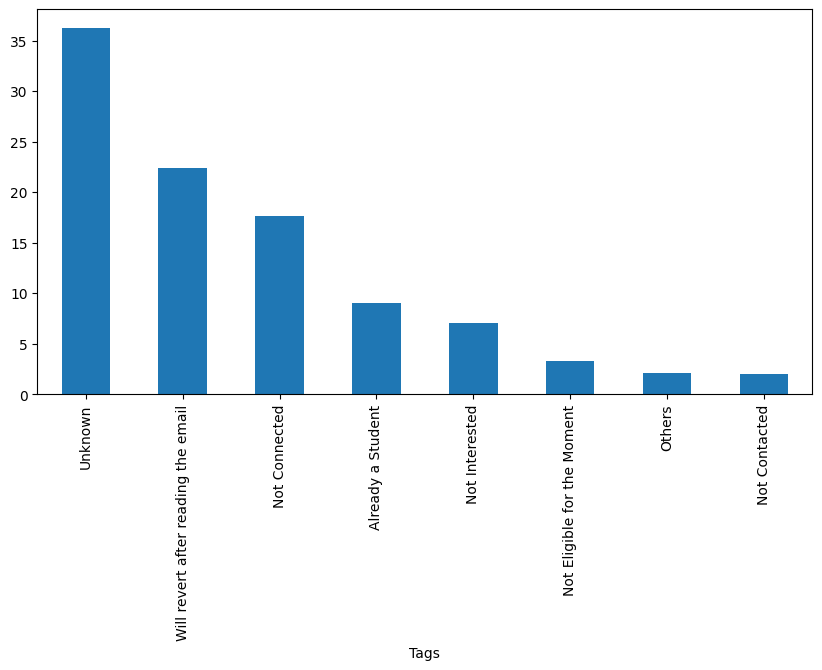

In [128]:
#create an 'Others' that are counts < 2
vc_tags = df['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2)
df['Tags'] = df['Tags'].replace(list(vc_tags[vc_tags<2].index), 'Others')
df['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])

### 4. What matters most to you in choosing a course

In [129]:
##counting the occurrences of each unique value 
df['What matters most to you in choosing a course'].value_counts(dropna = False,
                                                         normalize = True).mul(100).round(2)

What matters most to you in choosing a course
Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: proportion, dtype: float64

#### Insight:
70% value of 'What matters to ... choosing a course' is 'Better Career Prospects, 29% NaN value. So, this column is not problem to drop bcs it is useless.

### 5. What is your current occupation

In [130]:
#Counting the occurrences of each unique value 
df['What is your current occupation'].value_counts(dropna= False, normalize=True).mul(100).round(2)

What is your current occupation
Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_28896\3827827247.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What is your current occupation'].fillna('Other', inplace = True)


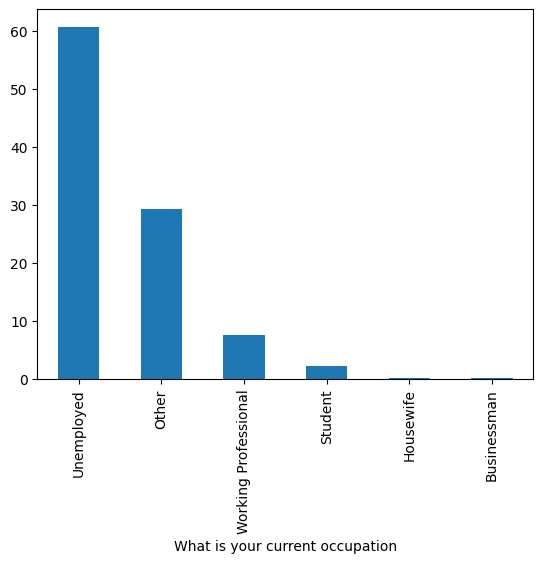

In [131]:
#Replace the value 'NaN' with 'Unemployed'
df['What is your current occupation'].fillna('Other', inplace = True)
#Visualize the 'What is your current occupation'
df['What is your current occupation'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot.bar()
plt.show()

### 6. Country

In [132]:
#Counting the occurrences of each unique value 
df['Country'].value_counts(dropna= False, normalize=True).mul(100).round(2)


Country
India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Canada                   0.04
Sweden                   0.03
Italy                    0.02
Belgium                  0.02
Ghana                    0.02
Philippines              0.02
Netherlands              0.02
China                    0.02
Asia/Pacific Region      0.02
Bangladesh               0.02
Uganda                   0.02
Russia                   0.01
Sri Lanka                0.01
Tanzania                 0.01
Kenya                    0.01
Ma

#### Insight:
Based on counting unique values of 'Country', it can be seen that India is almost all the values.
in the 'Country' so the column is not useful for analysis, it can be dropped.
#cols_to_drop.append('Country')

### 7. Page Views per Visit

In [133]:
#Check df that has missing value > 0
x = (df.isna().sum()/df.shape[0]*100)
x[x > 0].sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

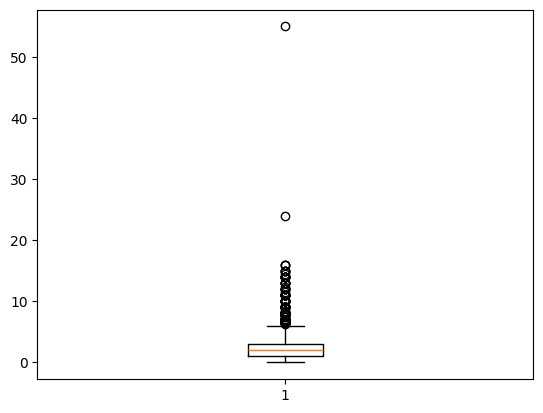

In [134]:
#Identify the data 'Page Views Per Visit' to determine the appropriate NaN filling
plt.boxplot(df['Page Views Per Visit'].dropna())
plt.show()

#### Insight and Action Plan:
The data contains outliers so it is more appropriate to fill NaN using the median of 'Page Views Per Visit'.

In [135]:
#Filling NaN using median.
pvp_visit = df['Page Views Per Visit'].median()
df['Page Views Per Visit'].fillna(pvp_visit, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28896\3232485760.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Page Views Per Visit'].fillna(pvp_visit, inplace=True)


### 8. TotalVisits

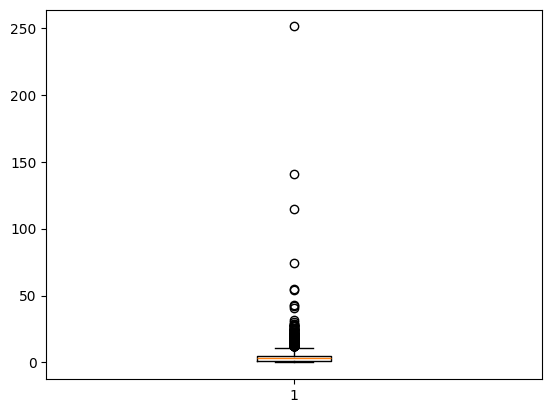

In [136]:
#Identify the data 'TotalVisits' to determine the appropriate NaN filling
plt.boxplot(df['TotalVisits'].dropna())
plt.show()

#### Action Plan:
The data contains outliers so it is more appropriate to fill NaN using the median of 'Total Visits'

In [137]:
#Fillinga NaN use median.
t_visit = df['TotalVisits'].median()
df['TotalVisits'].fillna(t_visit, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28896\539259408.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalVisits'].fillna(t_visit, inplace=True)


### 9. Last Activity

In [138]:
#counting the occurrences of each unique value 
vc_lastact = df['Last Activity'].value_counts(dropna= False, normalize=True).mul(100).round(2)
vc_lastact


Last Activity
Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: proportion, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_28896\4239242384.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Activity'].fillna('Email Opened', inplace=True)


<Axes: xlabel='Last Activity'>

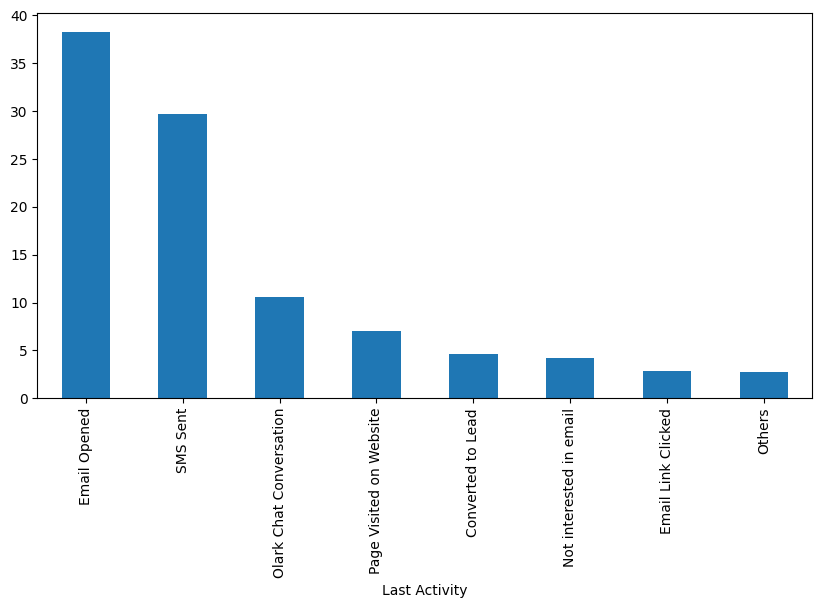

In [139]:
#Replace 'Visited Booth in Tradeshow','View in browser link Clicked' into 'Page Visited on Website'
df['Last Activity'] = df['Last Activity'].replace(['Visited Booth in Tradeshow','View in browser link Clicked'],'Page Visited on Website')
#Replace 'Resubscribed to emails' to 'Email Opened'
df['Last Activity'] = df['Last Activity'].replace('Resubscribed to emails','Email Opened')
#Replace 'Email Marked Spam','Email Bounced','Unsubscribed' into 'Not interested in email')
df['Last Activity'] = df['Last Activity'].replace(['Email Marked Spam','Email Bounced','Unsubscribed'],'Not interested in email')
#Replace the value NaN with mode of 'Last Activity'
df['Last Activity'].fillna('Email Opened', inplace=True)
#Create an 'Others' that are counts < 2
df['Last Activity'] = df ['Last Activity'].replace(list(vc_lastact[vc_lastact<2].index), 'Others')
df['Last Activity'].value_counts(dropna=False, normalize=True).mul(100).round(2).plot(kind='bar', figsize=[10,5])

### 10. Lead Source

In [140]:
#counting the occurrences of each unique value 
vc_leads= df['Lead Source'].value_counts(dropna= False, normalize=True).mul(100).round(2)
vc_leads


Lead Source
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Social Media          0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: proportion, dtype: float64

<Axes: xlabel='Lead Source'>

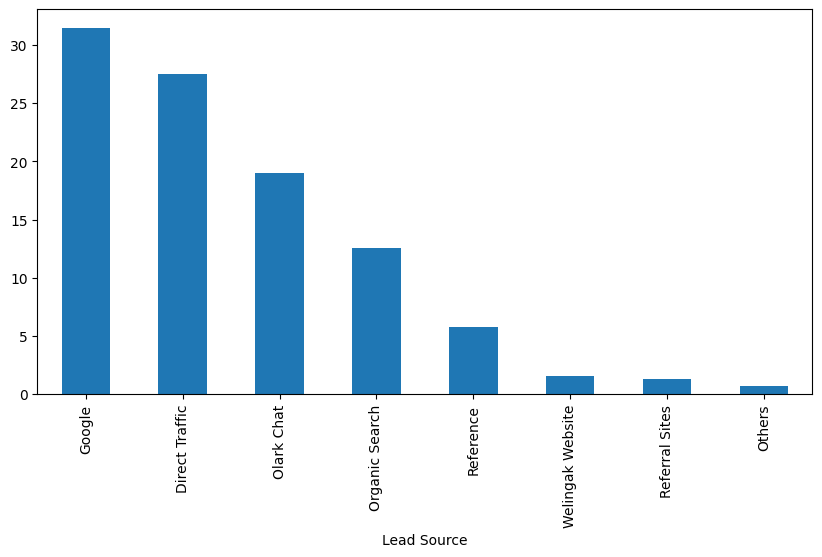

In [141]:
#Replacing 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google', 'Pay per Click Ads'], 'Google')
#imputing most frequent level, ie 'Google'
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')
#Replacing 'bing' to 'Organic Search'
df['Lead Source'] = df['Lead Source'].replace('bing','Organic Search')
#Replacing 'Live Chat' to 'Olark Chat'
df['Lead Source'] = df['Lead Source'].replace('Live Chat','Olark Chat')
#Replacing 'youtubechannel' to 'Social Media'
df['Lead Source'] = df['Lead Source'].replace(['youtubechannel','Facebook'],'Social Media')
#Create an 'Others' that are counts < 1
df['Lead Source'] = df ['Lead Source'].replace(list(vc_leads[vc_leads<1].index), 'Others')
df['Lead Source'].value_counts(dropna=False, normalize=True).mul(100).round(2).plot(kind='bar', figsize=[10,5])

# Drop Columns

In [142]:
df.shape

(9240, 30)

In [143]:
#drop the column that is not usefull
#list of columns to be dropped
#Adding 'Prospect ID' and 'Lead Number' to this list as these are id columns and of any use to analysis
cols_to_drop = ['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course','Country']
#dropping the columns in cols_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)

In [144]:
#checking for missing value again
df.isna().any()

Lead Origin                                 False
Lead Source                                 False
Do Not Email                                False
Do Not Call                                 False
Converted                                   False
TotalVisits                                 False
Total Time Spent on Website                 False
Page Views Per Visit                        False
Last Activity                               False
Specialization                              False
What is your current occupation             False
Search                                      False
Magazine                                    False
Newspaper Article                           False
X Education Forums                          False
Newspaper                                   False
Digital Advertisement                       False
Through Recommendations                     False
Receive More Updates About Our Courses      False
Tags                                        False


# Handling Outlier

In [146]:
#Select a numeric column from df except variable target ('Converted')
num_cols = [col for col in df.select_dtypes(include='number').columns if col != 'Converted']
print(num_cols)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### Action Plan:
Limit technique: defines a limit value (usually using percentile or quartile values) where data that exceeds that limit is considered an outlier.
Data that exceeds the specified limit is removed from the DataFrame.


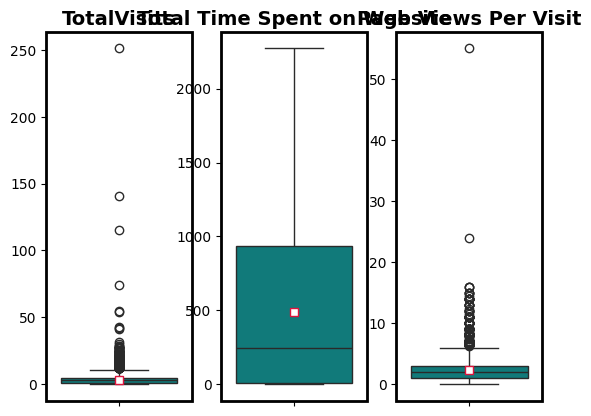

<Figure size 1000x800 with 0 Axes>

In [147]:
#Create a boxplot visualization function 
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(2)

for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols), i+1)
    box_plot(num_cols[i])
plt.figure(figsize=[10,8])

plt.tight_layout()
plt.show()


#### Insight:
Outlier data is found in the 'Total Visits' and 'Page Views per Visit' Columns.

Drop values greater than lim1 or lim2. so, the values will be included in the analysis are the values that are smaller than lim1 or lim2.

In [148]:
def remove_outliers(df, cols, threshold=0.995):
    """
    Menghapus outlier berdasarkan threshold quantile.
    :param df: DataFrame
    :param cols: Daftar nama kolom yang ingin diperiksa
    :param threshold: Persentil batas untuk outlier (default: 99.5%)
    :return: DataFrame setelah outlier dihapus
    """
    lims = {col: df[col].quantile(threshold) for col in cols}  # Hitung batas atas
    outlier_indices = df[(df[cols[0]] > lims[cols[0]]) | (df[cols[1]] > lims[cols[1]])].index
    return df.drop(outlier_indices)

df = remove_outliers(df, ['TotalVisits', 'Page Views Per Visit'])

#### Action Plan:
We have finished missing value, initial feature engineering, and outlier. Next, there is something that needs to be check, i.e., the number of unique values (distinct values) contain in the category column.

# EDA

## Handling Each Column for Distinct Value

In [150]:
#Define category column into a list
cat_cols = [col for col in df.select_dtypes(include='object').columns]

#Number of distinct value in each categorical column
df[cat_cols].nunique().sort_values()

Receive More Updates About Our Courses       1
Magazine                                     1
Get updates on DM Content                    1
Update me on Supply Chain Content            1
I agree to pay the amount through cheque     1
Newspaper Article                            2
Do Not Call                                  2
Do Not Email                                 2
Through Recommendations                      2
Digital Advertisement                        2
Search                                       2
Newspaper                                    2
A free copy of Mastering The Interview       2
X Education Forums                           2
City                                         3
Lead Origin                                  5
What is your current occupation              6
Tags                                         8
Last Activity                                8
Lead Source                                  8
Specialization                              10
Last Notable 

#### Insight and Action Plan:
Columns containing distinct values < 2 will be dropped because it is not have any unique values and give useful information.

Binary cat_cols:

In [151]:
#Drop columns with less than 2 unique values (levels)
cols_to_drop = [col for col in cat_cols if df[col].nunique() < 2]
df.drop(columns=cols_to_drop, axis = 1, inplace=True)
#Update the cat_cols list by dropping the columns that have been dropped from the df
cat_cols = list(set(cat_cols) - set(cols_to_drop))

Next, check the category column that has distinct level = 2 or we call it binary category.

C:\Users\User\AppData\Local\Temp\ipykernel_28896\3486540053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[binary_cat_cols[i]], palette = 'deep')
C:\Users\User\AppData\Local\Temp\ipykernel_28896\3486540053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[binary_cat_cols[i]], palette = 'deep')
C:\Users\User\AppData\Local\Temp\ipykernel_28896\3486540053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[binary_cat_cols[i]], palette = 'deep')
C:\Users\User\AppData\Local\Temp\ipykernel_28896\3486540053.py:13: Fut

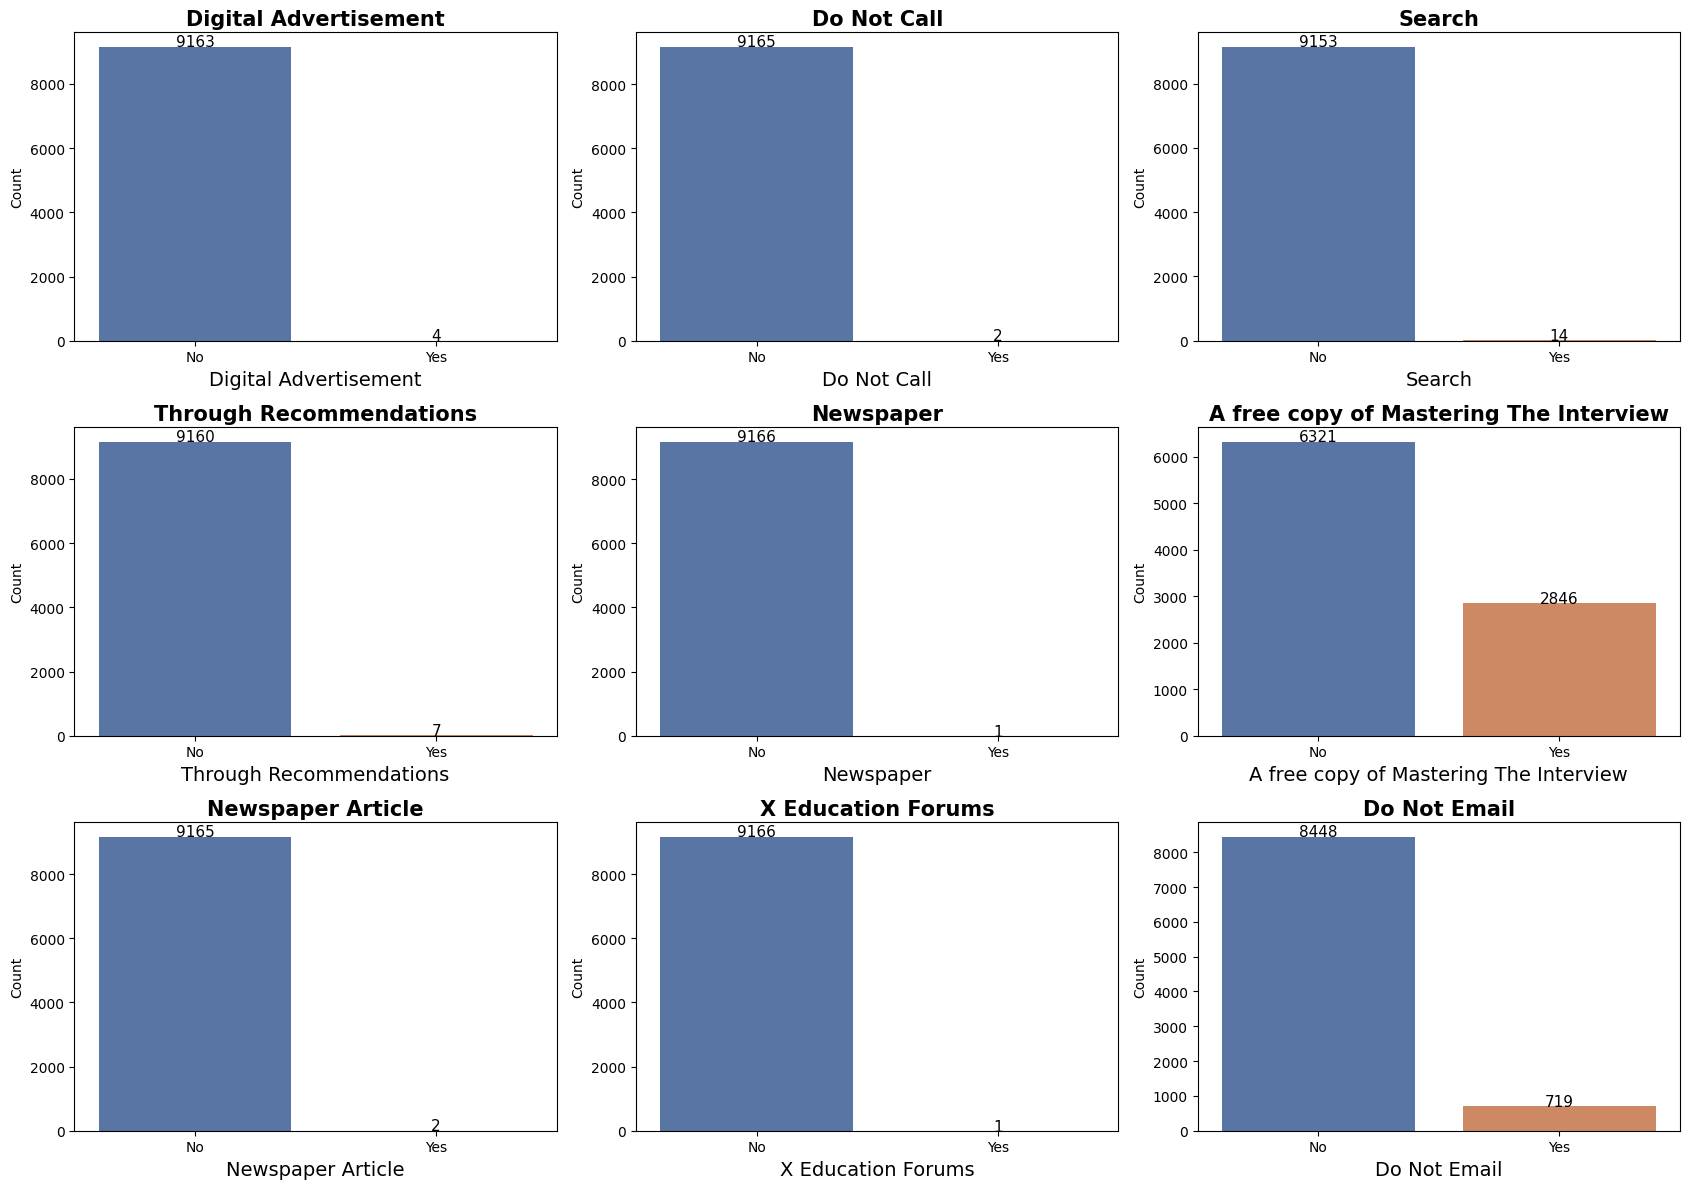

In [152]:
#Identify the binary categorical column
binary_cat_cols = [col for col in cat_cols if df[col].nunique() == 2]

#Create figure with size 17x12 inch
plt.figure(figsize=[17, 12])

#Iteration for each column in list binary_cat_cols
for i in range(len(binary_cat_cols)):
    #Create a 3x3 grid of subplots and determine the position of subplot based on the index i+1
    plt.subplot(3, 3, i+1)
    
    #Create plot calculations 
    sns.countplot(x=df[binary_cat_cols[i]], palette = 'deep')
    
    #Add title and label
    plt.title(f'{binary_cat_cols[i]}', fontsize = 15, fontweight = 'bold', pad = 5)
    plt.xlabel(binary_cat_cols[i], fontsize = 14)
    plt.ylabel('Count')

    #Add count number above bar
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width()/2.,
                p.get_height() + 5,
                int(p.get_height()),
                ha='center', fontsize=11)

#Set the layout so that it is not layered
plt.tight_layout()

#Show plot
plt.show()

#### Insight:
In the binary category variables, 7 of them have almost no contribution so we can drop them. Meanwhile, the 2 variables will still be used.

In [153]:
cols_to_drop = ['Do Not Call',
                'Search',
                'Newspaper',
                'X Education Forums',
                'Newspaper Article',
                'Digital Advertisement',
                'Through Recommendations']

#updating the list of binary catagorical variables
binary_cat_cols = list(set(binary_cat_cols) - set(cols_to_drop))
cat_cols = list(set(cat_cols) - set(cols_to_drop))

#dropping the columns in cols_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)

#### Insight:
Since 'City', 'Last Activity', 'Lead Source', 'Tags', and 'Specialization' has been handled at the time of handling missing values, we proceed to review 'Lead Origin' and 'Last Noble Activity'.

In [154]:
#counting the occurrences of each unique value for 'Lead Origin'
df['Lead Origin'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Lead Origin
Landing Page Submission    52.68
API                        38.89
Lead Add Form               7.82
Lead Import                 0.60
Quick Add Form              0.01
Name: proportion, dtype: float64

#### Insight:
The value 'Lead Add Form' is the same as the value 'Quick Add Form', so we combine it to 'Lead Add Form'

<Axes: xlabel='Lead Origin'>

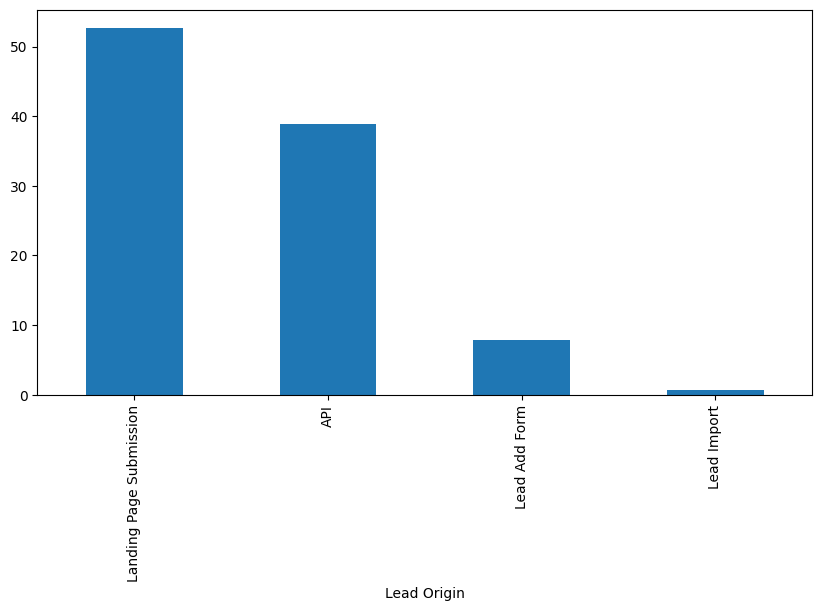

In [155]:
#Merge 'Quick Add Form' to 'Lead Add Form'
df['Lead Origin'] = df['Lead Origin'].replace('Quick Add Form', 'Lead Add Form')
df['Lead Origin'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])


In [156]:
#Check unique value for 'Last Notable Activity'
df['Last Notable Activity'].value_counts(normalize=True).mul(100).round(2)

Last Notable Activity
Modified                        36.93
Email Opened                    30.61
SMS Sent                        23.60
Page Visited on Website          3.28
Olark Chat Conversation          1.99
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: proportion, dtype: float64

#### Action Plan:
- Group 'Email Received','SMS Sent' into a category called 'SMS/Email Sent'.
- Group 'Email Marked Spam','Email Bounced','Unsubscribed', into a category called 'Not interested in email'.
- Group 'Resubscribed to emails' into 'Email Opened'.
- Group 'Visited Booth in Tradeshow' into 'Page Visited on Website'.

In [157]:
#Replace 'Email Received','SMS Sent' into 'SMS/Email Sent'.
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Received','SMS Sent'], 'SMS/Email Sent')
#Replace 'Email Marked Spam','Email Bounced','Unsubscribed', into a category called 'Not interested in email'.
df['Last Notable Activity'] = df['Last Notable Activity'].replace([ 'Email Marked Spam','Email Bounced','Unsubscribed'], 'Not interested in email')
#Replace 'Resubscribed to emails' into 'Email Opened'.
df['Last Notable Activity'] = df['Last Notable Activity'].replace('Resubscribed to emails' , 'Email Opened')
#Replace 'Visited Booth in Tradeshow' into 'Page Visited on Website'
df['Last Notable Activity'] = df['Last Notable Activity'].replace('Visited Booth in Tradeshow' , 'Page Visited on Website')

<Axes: xlabel='Last Notable Activity'>

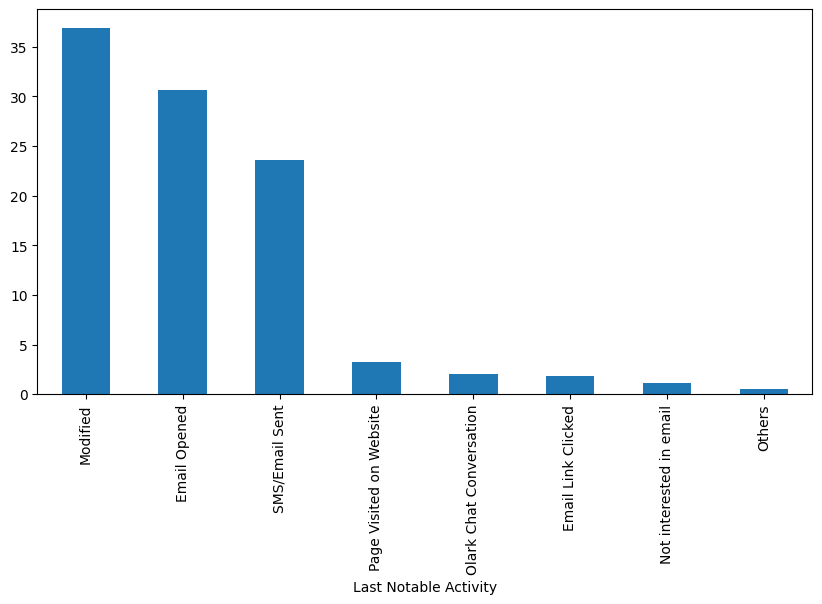

In [158]:
#Create an 'Others' that are counts < 1
x= df['Last Notable Activity'].value_counts(normalize=True).mul(100).round(2)
df['Last Notable Activity'] = df['Last Notable Activity'].replace(list(x[x<1].index), 'Others')
df['Last Notable Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9167 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9167 non-null   object 
 1   Lead Source                             9167 non-null   object 
 2   Do Not Email                            9167 non-null   object 
 3   Converted                               9167 non-null   int64  
 4   TotalVisits                             9167 non-null   float64
 5   Total Time Spent on Website             9167 non-null   int64  
 6   Page Views Per Visit                    9167 non-null   float64
 7   Last Activity                           9167 non-null   object 
 8   Specialization                          9167 non-null   object 
 9   What is your current occupation         9167 non-null   object 
 10  Tags                                    9167 non-null   object 
 

In [160]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [161]:
cat_cols

['Lead Origin',
 'Lead Source',
 'City',
 'A free copy of Mastering The Interview',
 'Specialization',
 'Tags',
 'What is your current occupation',
 'Do Not Email',
 'Last Activity',
 'Last Notable Activity']

## Target Variable

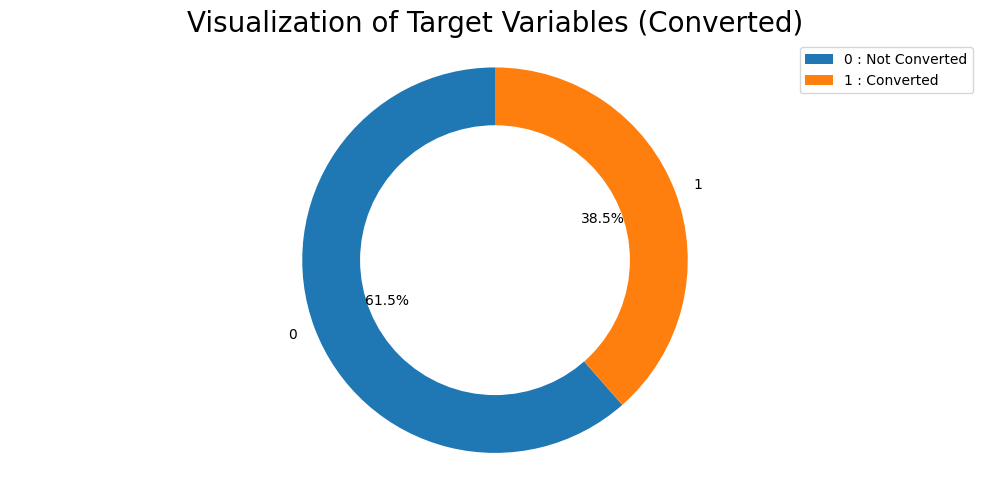

In [162]:
#Count the number of unique values in 'Converted'.
converted_counts = df['Converted'].value_counts()

#Create donut chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('equal')  #So that the donut chart is circular
ax.pie(converted_counts, labels=converted_counts.index, autopct='%1.1f%%', startangle=90)

#Create a white circle in the middle to make a donut effect.
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)

# Add title and legend
ax.set_title("Visualization of Target Variables (Converted)", size=20)
plt.legend(labels=['0 : Not Converted', '1 : Converted'], loc='upper right')

plt.tight_layout()
plt.show()

#### Insight:
- Mayoritas lead (61.5%) tidak melakukan conversi, menunjukkan bahwa sebagian besar lead yang berinteraksi dengan website tidak tertarik atau tidak memenuhi kriteria pembelian.
- Hanya 38.5% lead yang berhasil dikonversi, yang berarti bahwa Perusahaan Education perlu strategi yang lebih efektif dalam memprioritaskan prospek agar tidak membuang sumber daya pada lead dengan peluang konversi rendah.
- Target konversi perusahaan adalah 80%, sementara saat ini hanya 38.5%, yang menunjukkan bahwa Lead Scoring menjadi krusial dalam meningkatkan efektivitas strategi penjualan.
- Perbandingan proporsi data ini 60 vs 30, artinya tidak sepenuhnya seimbang tetapi tidak ekstrem.

#### Action Plan:
Oleh karena kelas lebih condong kes alah satu kelas, dibutuhkannya machine learning yang lebih robust terhadap ketidakseimbangan, seperti Random Forest, XGboost, dan lain-lain.




## Category Variables

In [163]:
#Functions for visualizing categorical data
def visualize_variable(df, x, y='Converted', p='viridis'):
    fig, axes = plt.subplots(1, 3, figsize=(25, 9))

    # 1. Visualization of value_counts in percent
    value_counts = df[x].value_counts(normalize=True) * 100
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
    axes[0].set_title(f'Percentage of "{x}"', fontsize=15, fontweight='bold', pad=5)
    axes[0].set_xlabel(x, fontsize=14)
    axes[0].set_ylabel('Percentage', fontsize=14)
    axes[0].patch.set_edgecolor('black')
    axes[0].patch.set_linewidth(1.5)
    for k in axes[0].patches:
        axes[0].annotate('{:.1f} %'.format(k.get_height()), (k.get_x()+ k.get_width()/2,
                                                                 k.get_height()),ha='center', va='bottom', fontsize=10)
    axes[0].tick_params(axis='x', rotation=90)

    # 2. Visualization of categories based on y variable
    sns.countplot(x=df[x], hue=df[y], palette=p, ax=axes[1])
    axes[1].set_title(f'"{x}" Composition by "{y}"', fontsize=15, fontweight='bold', pad=5)
    axes[1].set_xlabel(x, fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].patch.set_edgecolor('black')
    axes[1].patch.set_linewidth(1.5)
    axes[1].tick_params(axis='x', rotation=90)

    # 3. Visualization of conversion rate by category
    conversion_rates = df.groupby(x)[y].mean() * 100  # to percentage
    sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
    axes[2].set_title(f'Conversion Rate of "{x}"', fontsize=18, fontweight='bold', pad=8)
    axes[2].set_xlabel(x, fontsize=16)
    axes[2].set_ylabel('Rate (%)', fontsize=16) 
    axes[2].patch.set_edgecolor('black')
    axes[2].patch.set_linewidth(1.5)
    for k in axes[2].patches:
        axes[2].annotate('{:.1f} %'.format(k.get_height()), (k.get_x()+ k.get_width()/2,
                                                                 k.get_height()),ha='center', va='bottom', fontsize=10)
    axes[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


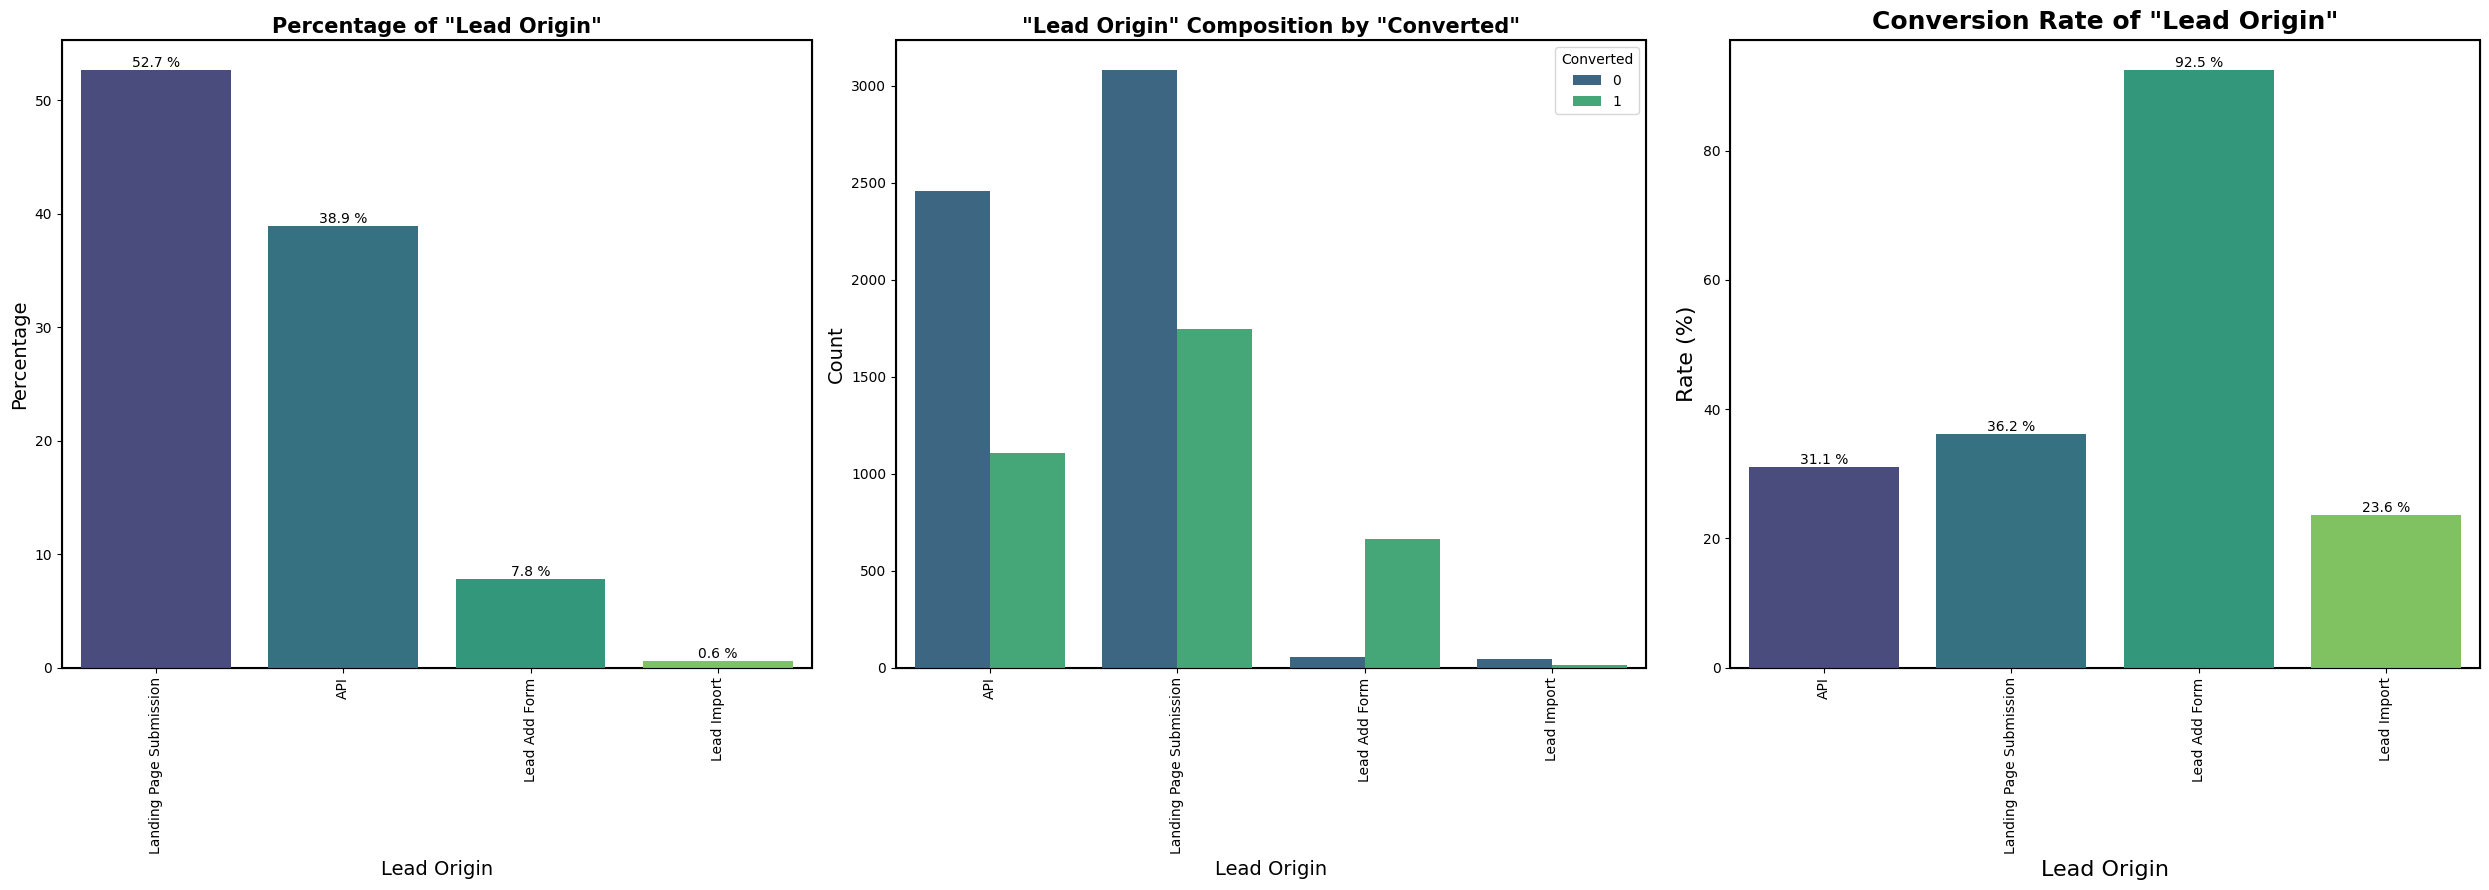

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


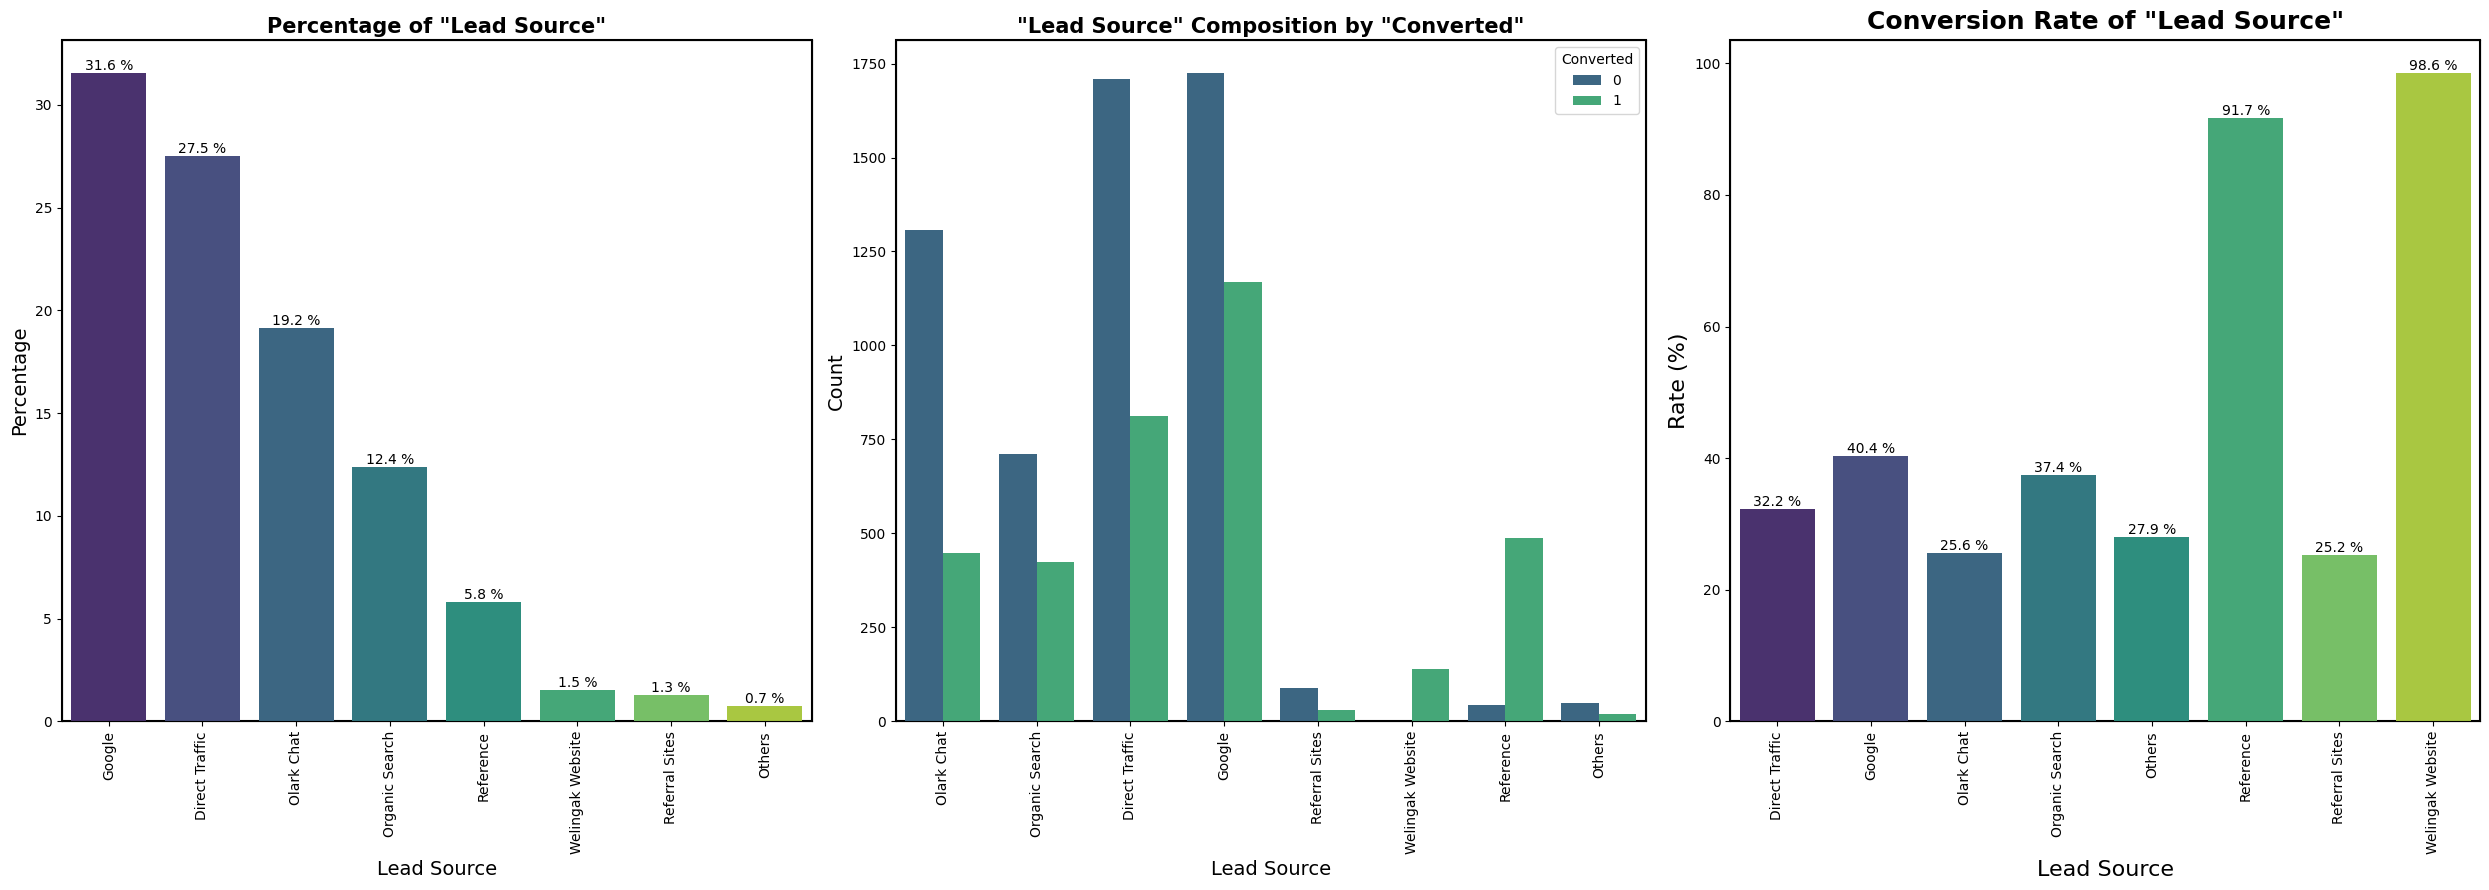

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


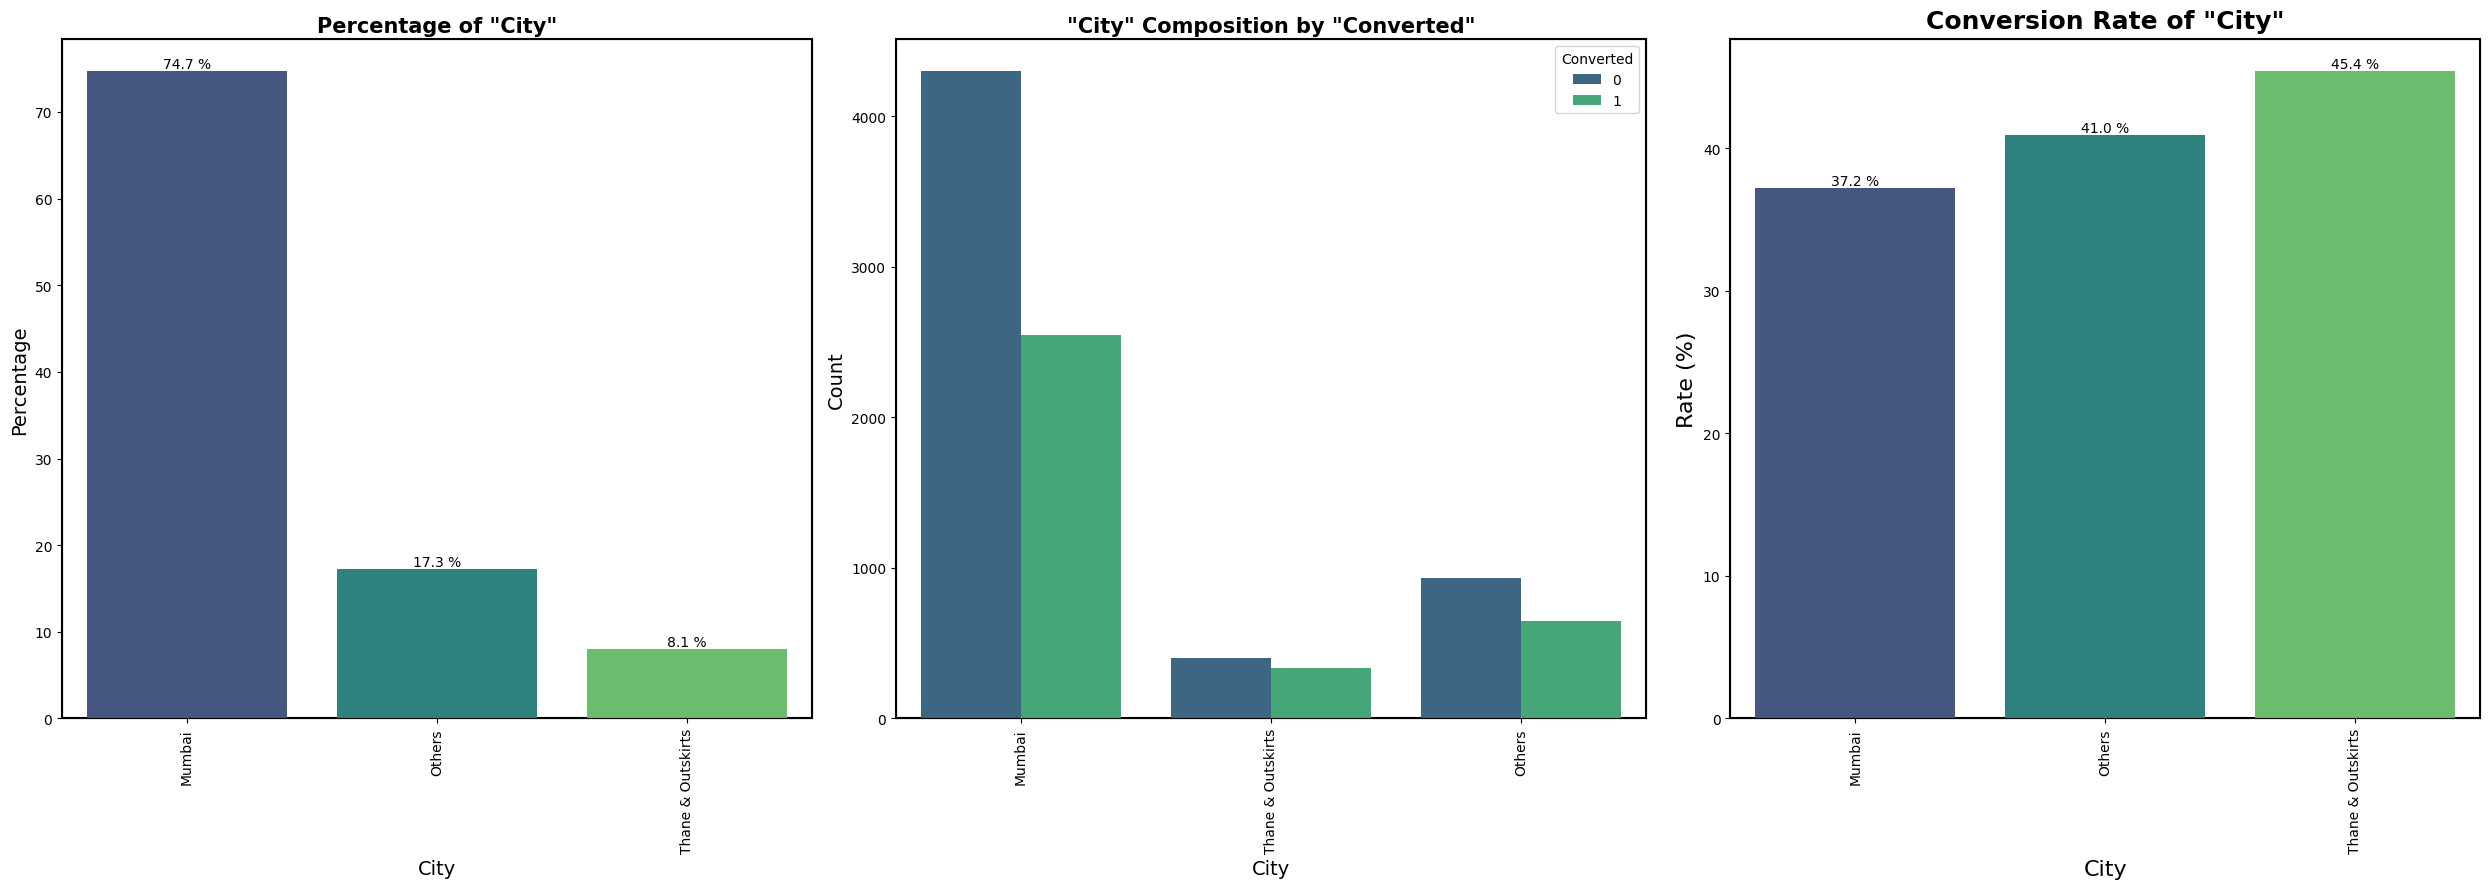

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


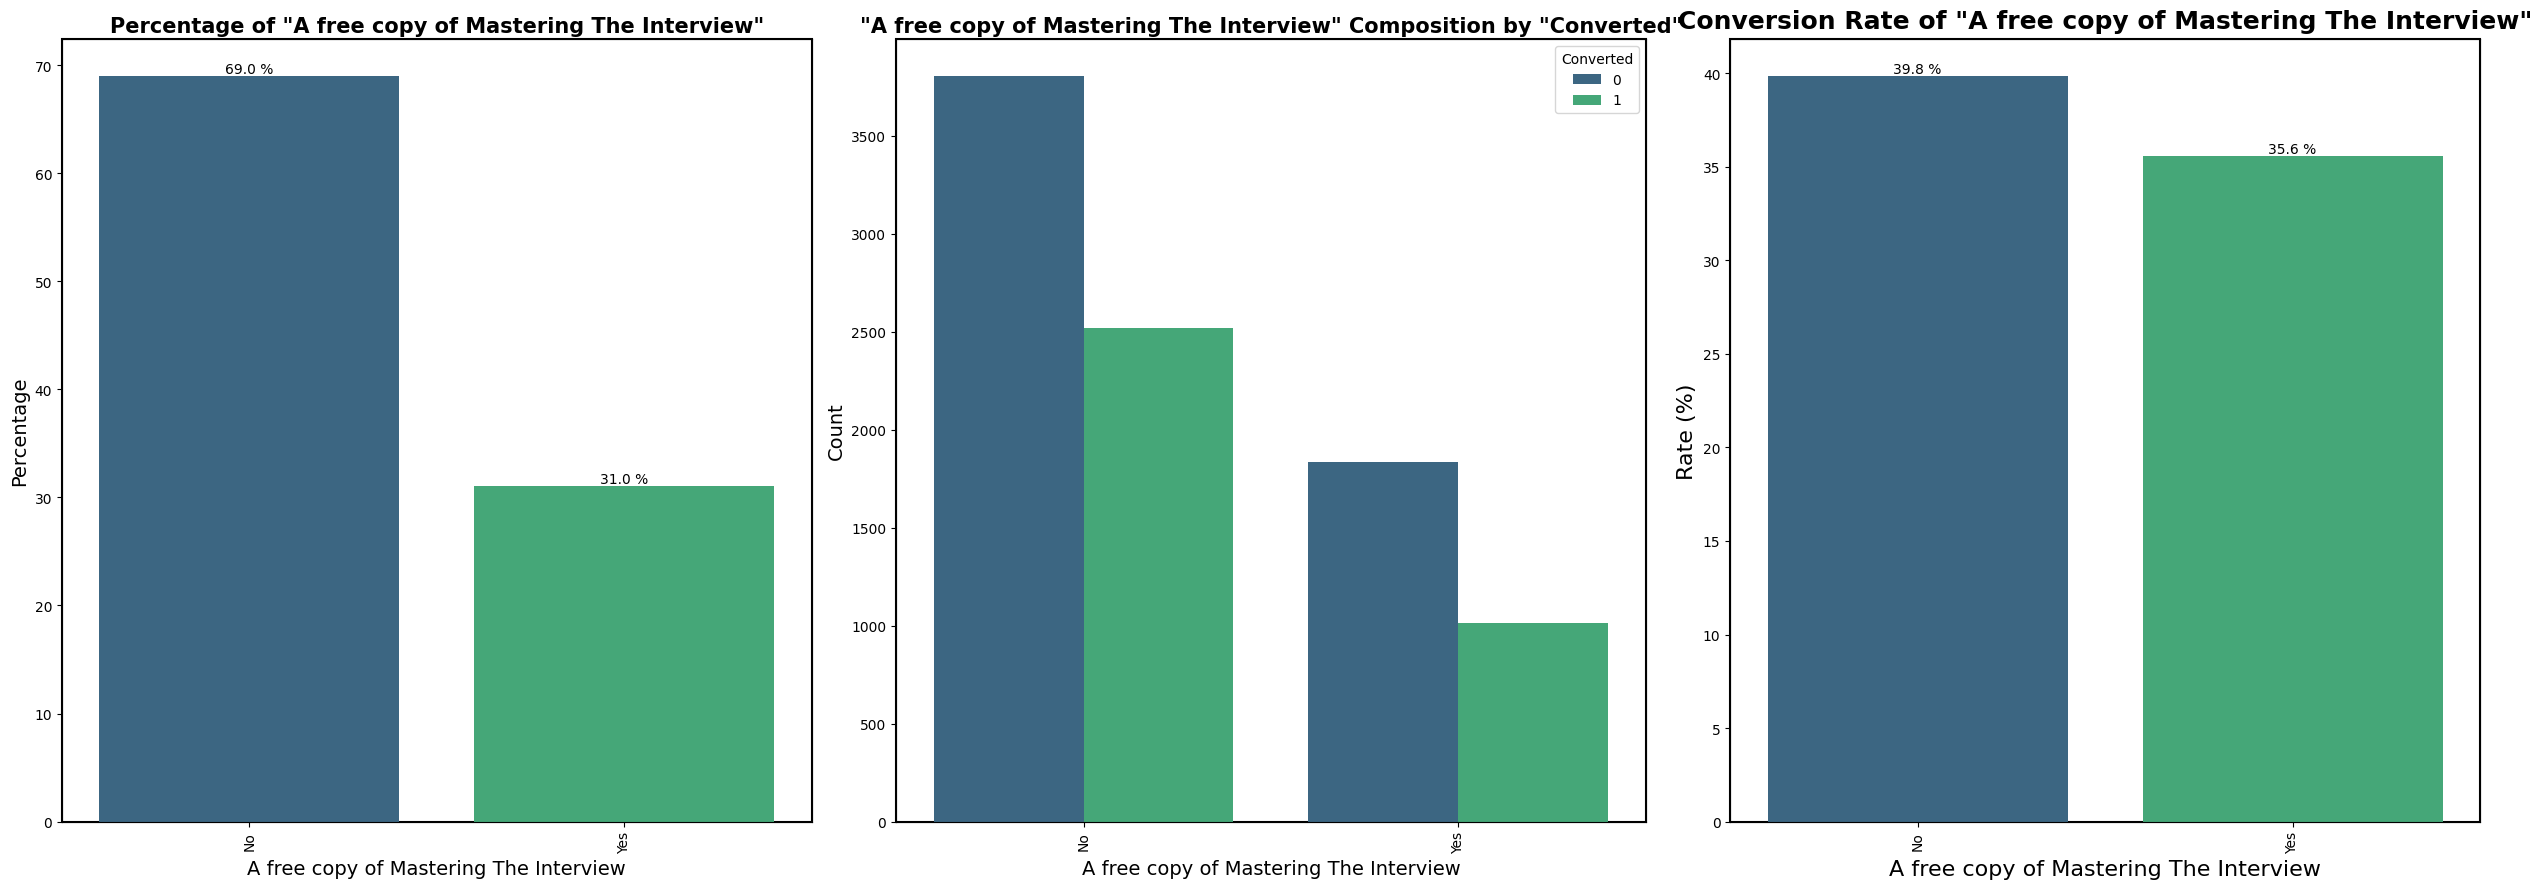

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


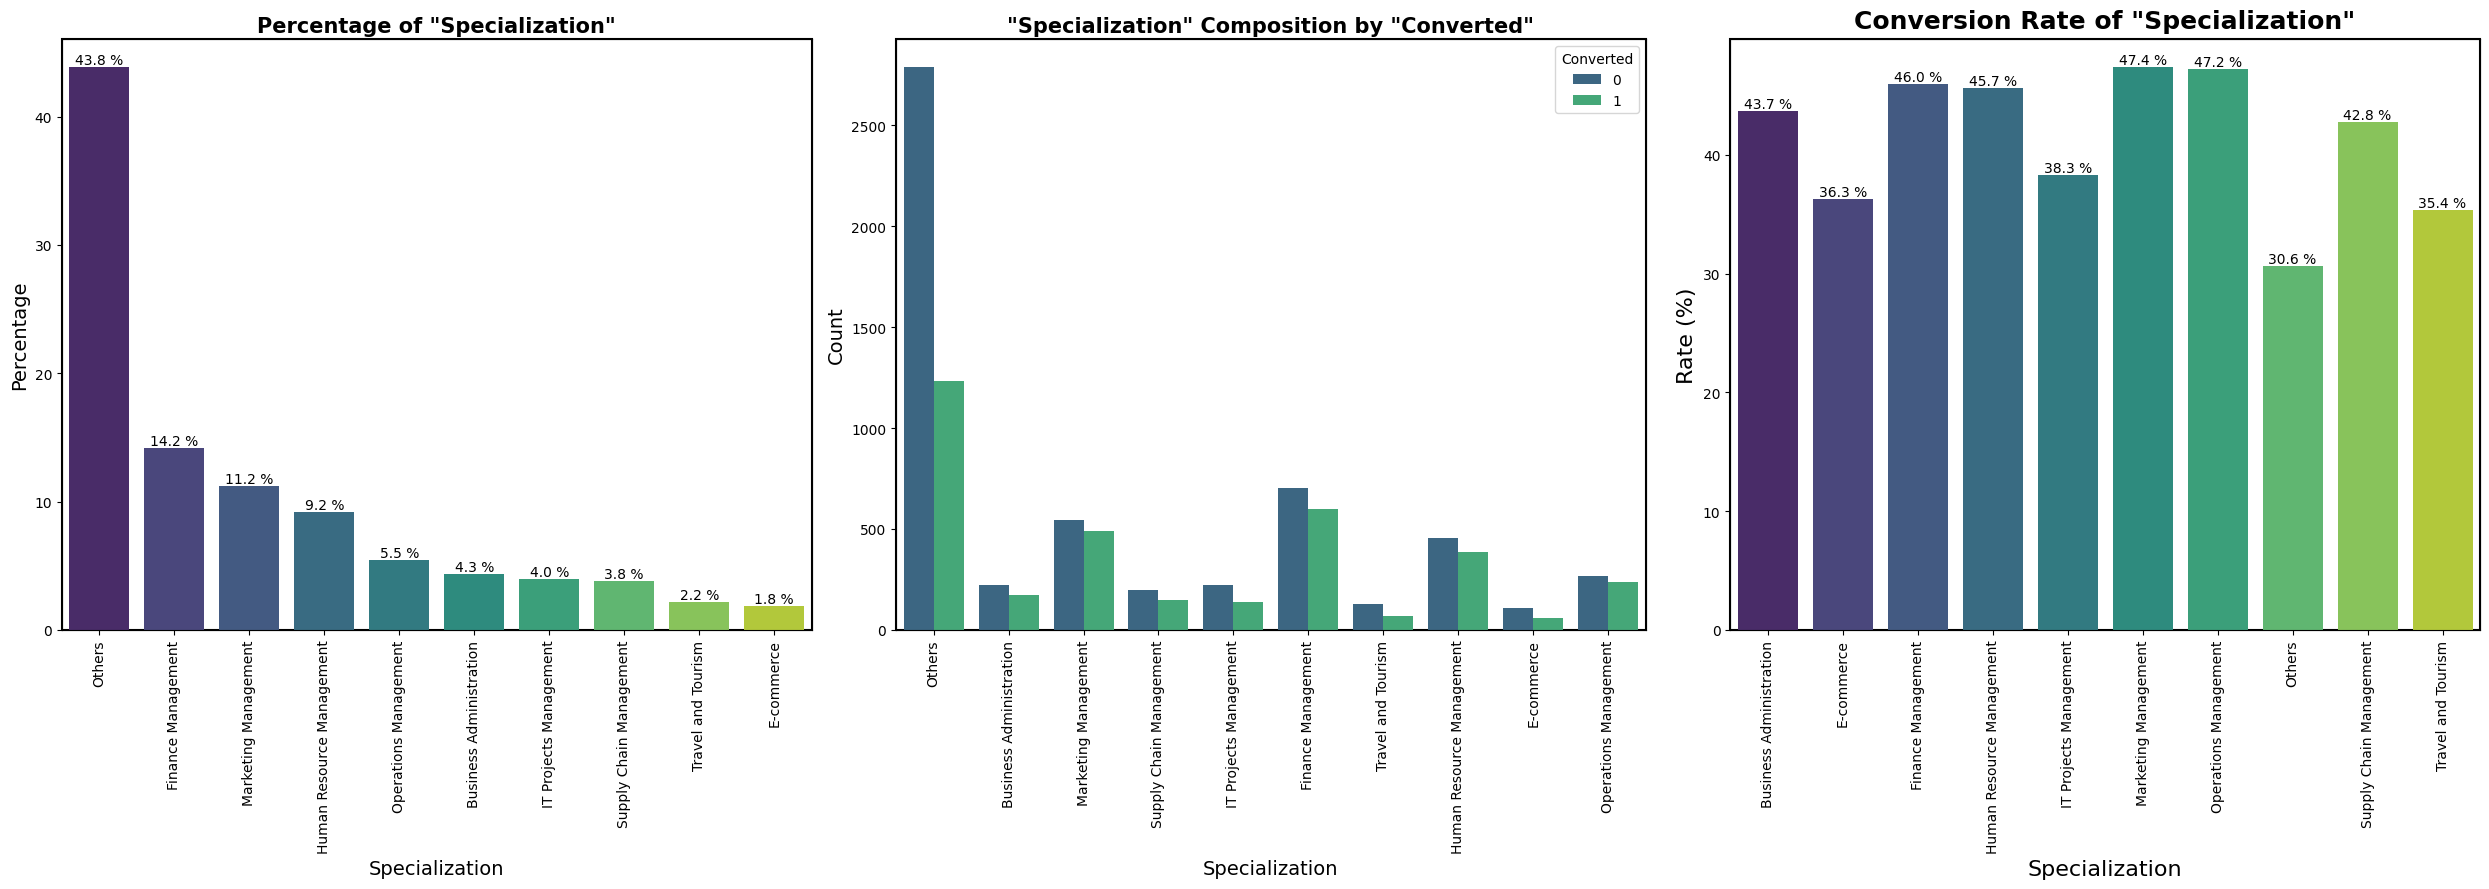

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


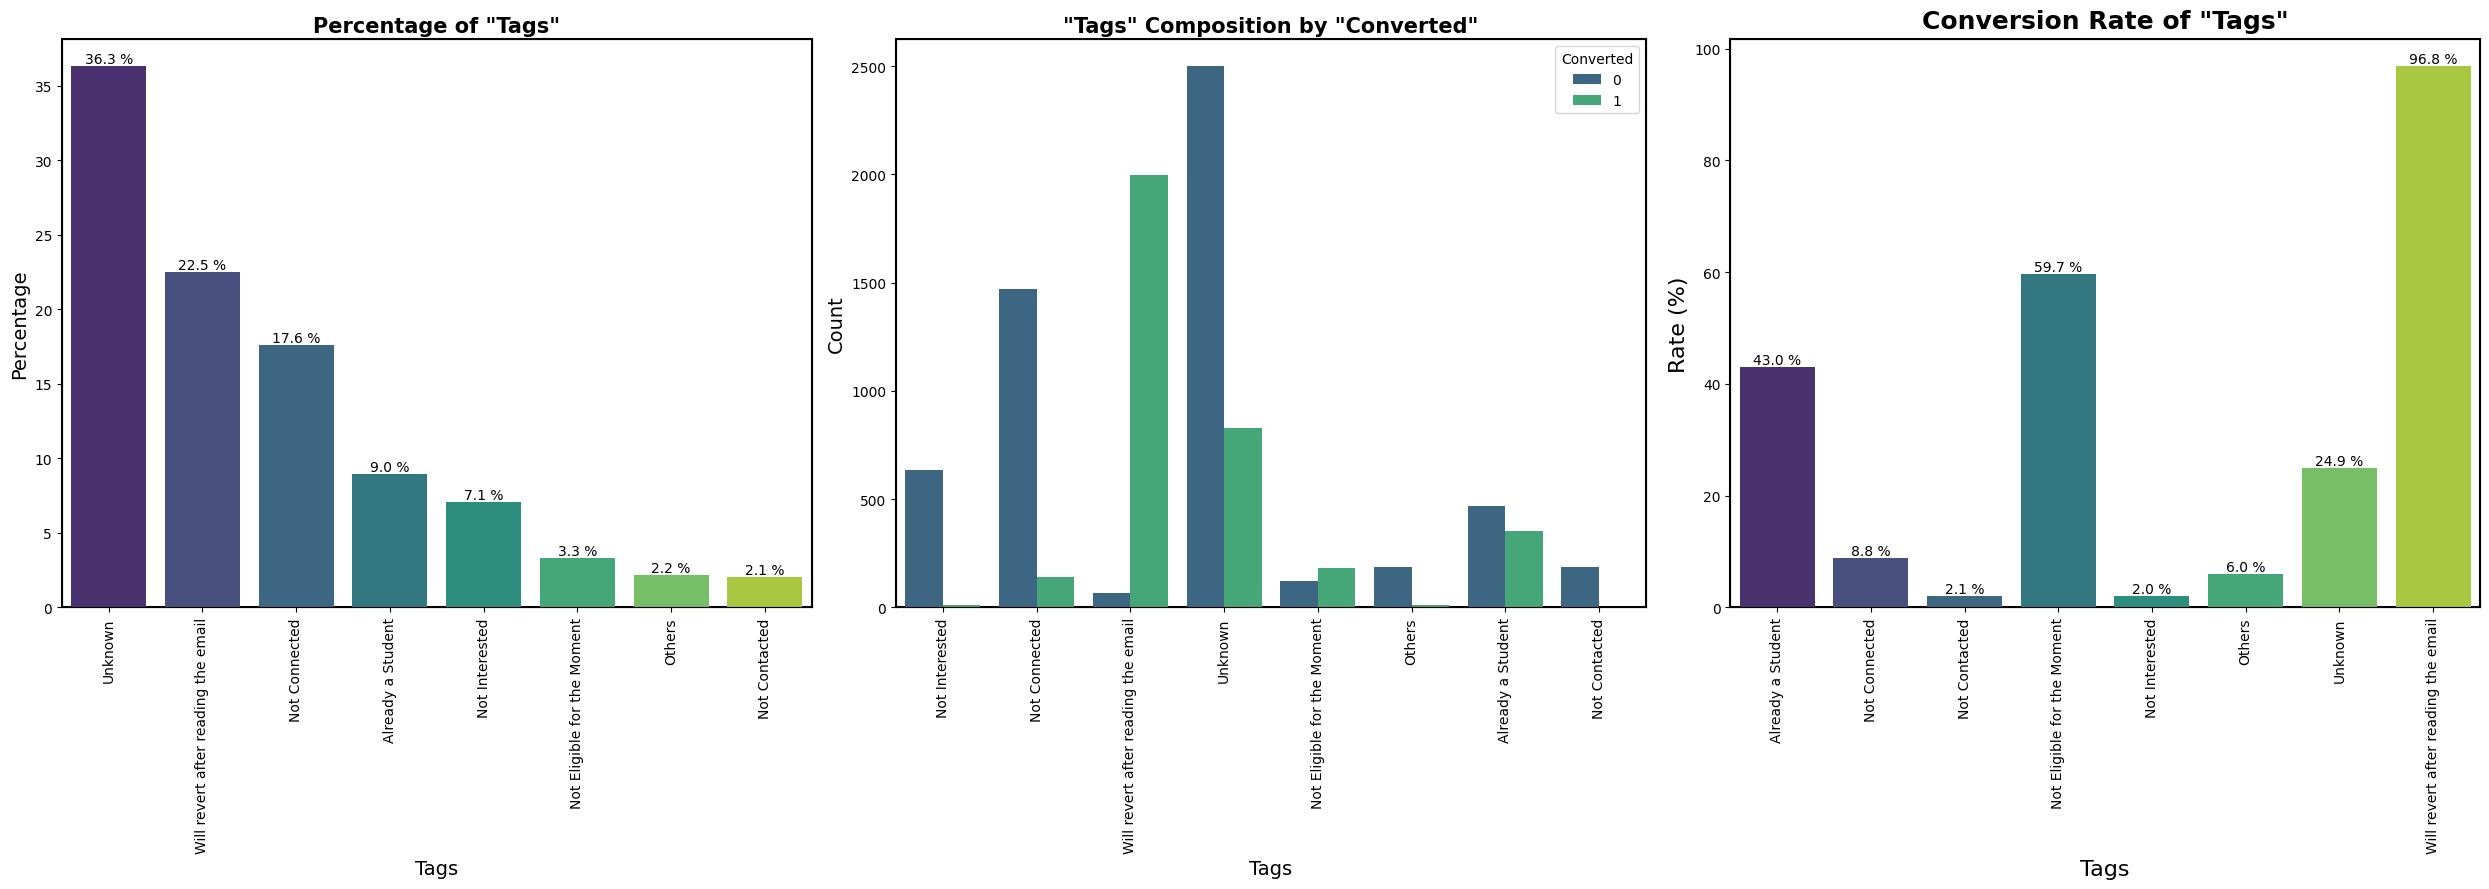

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


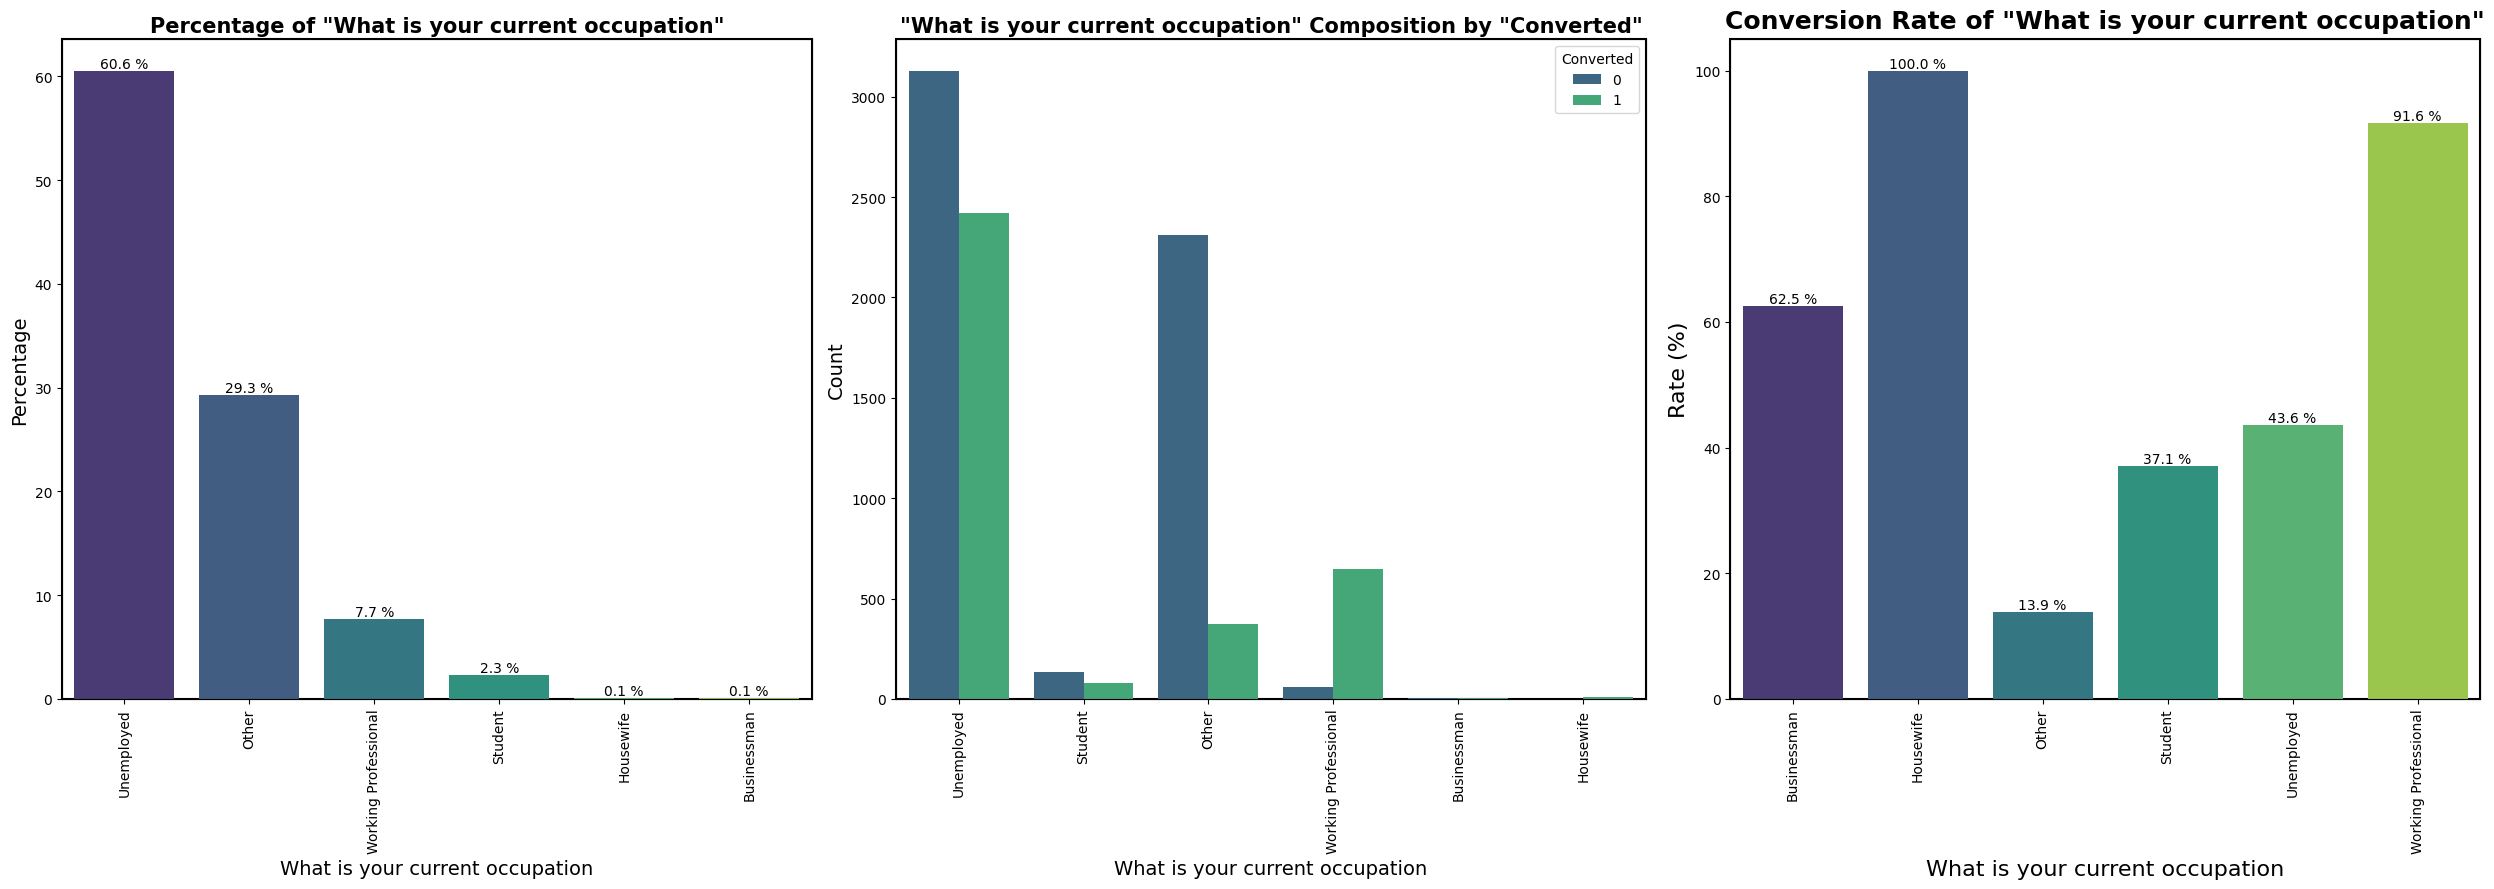

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


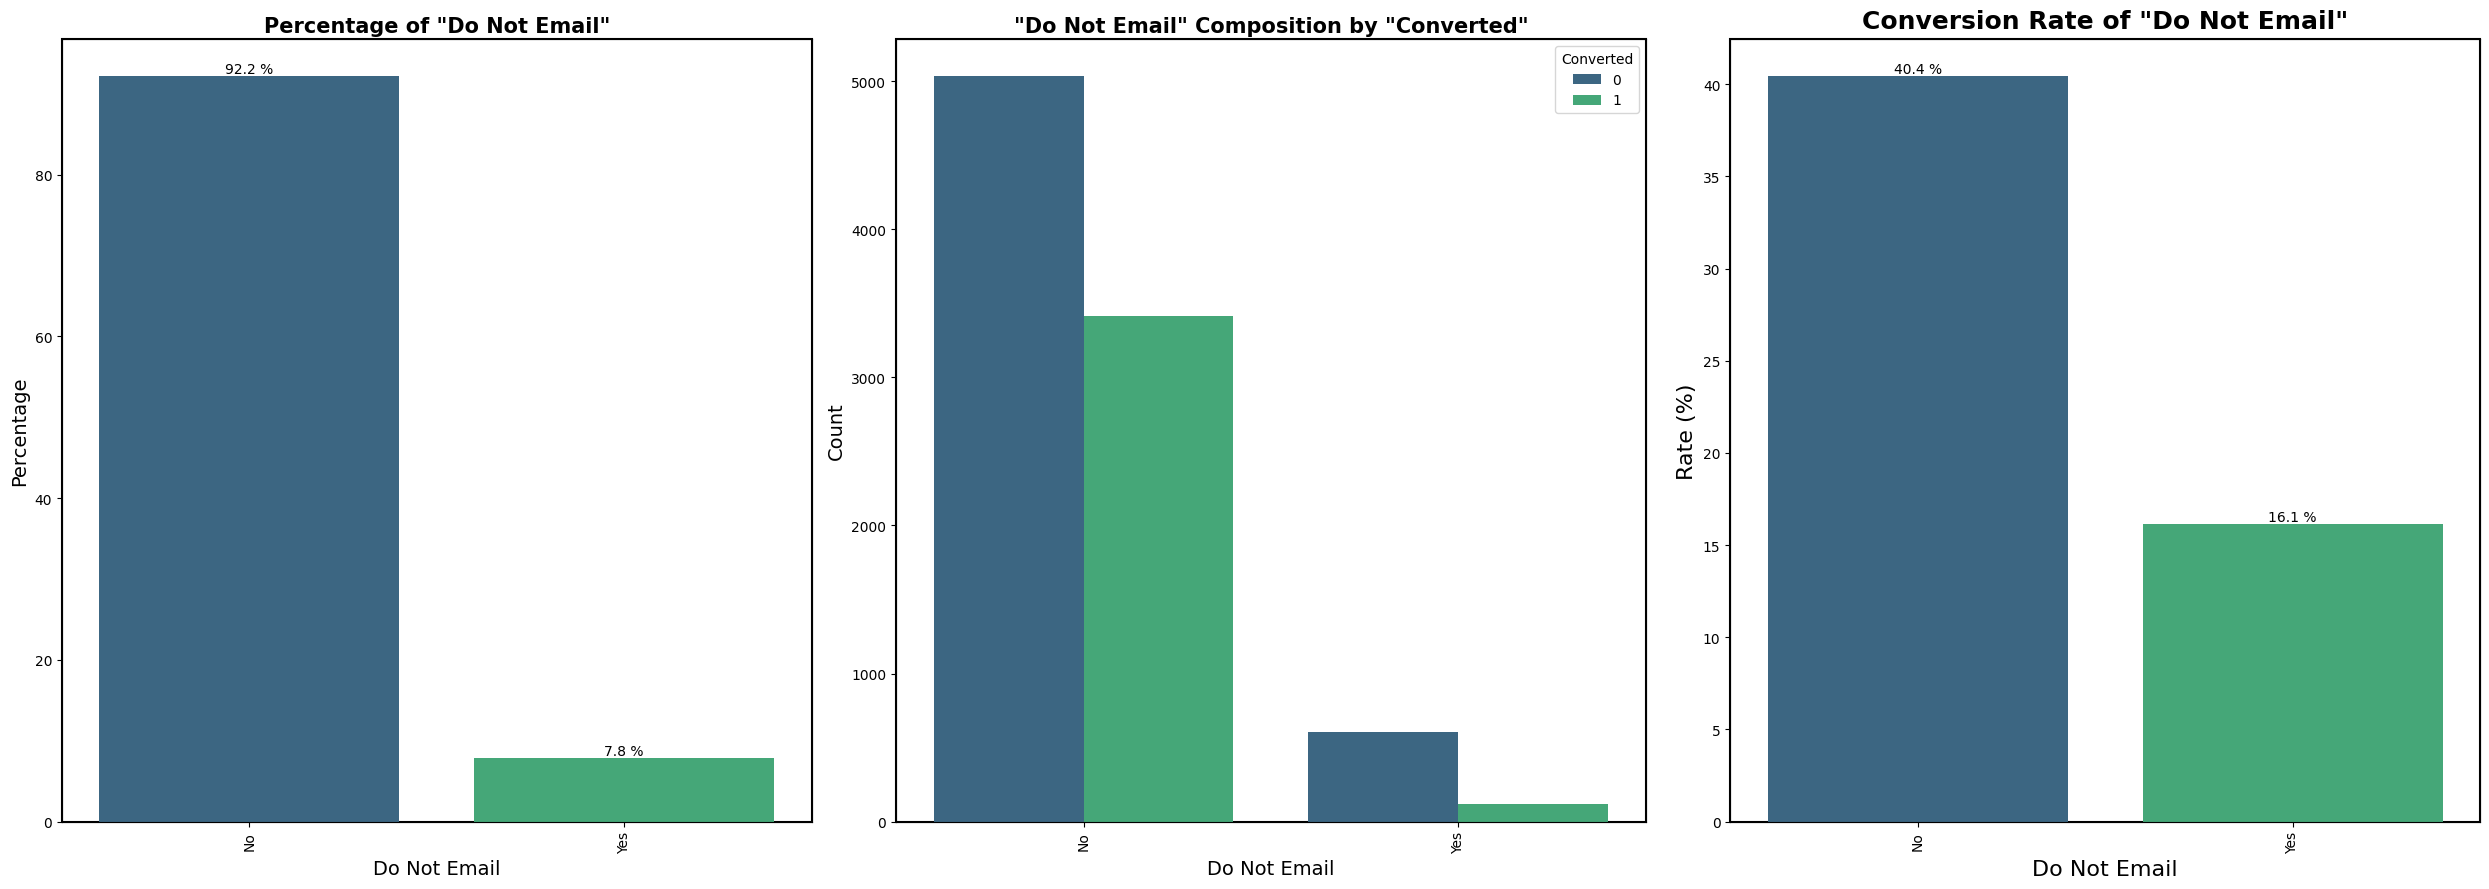

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


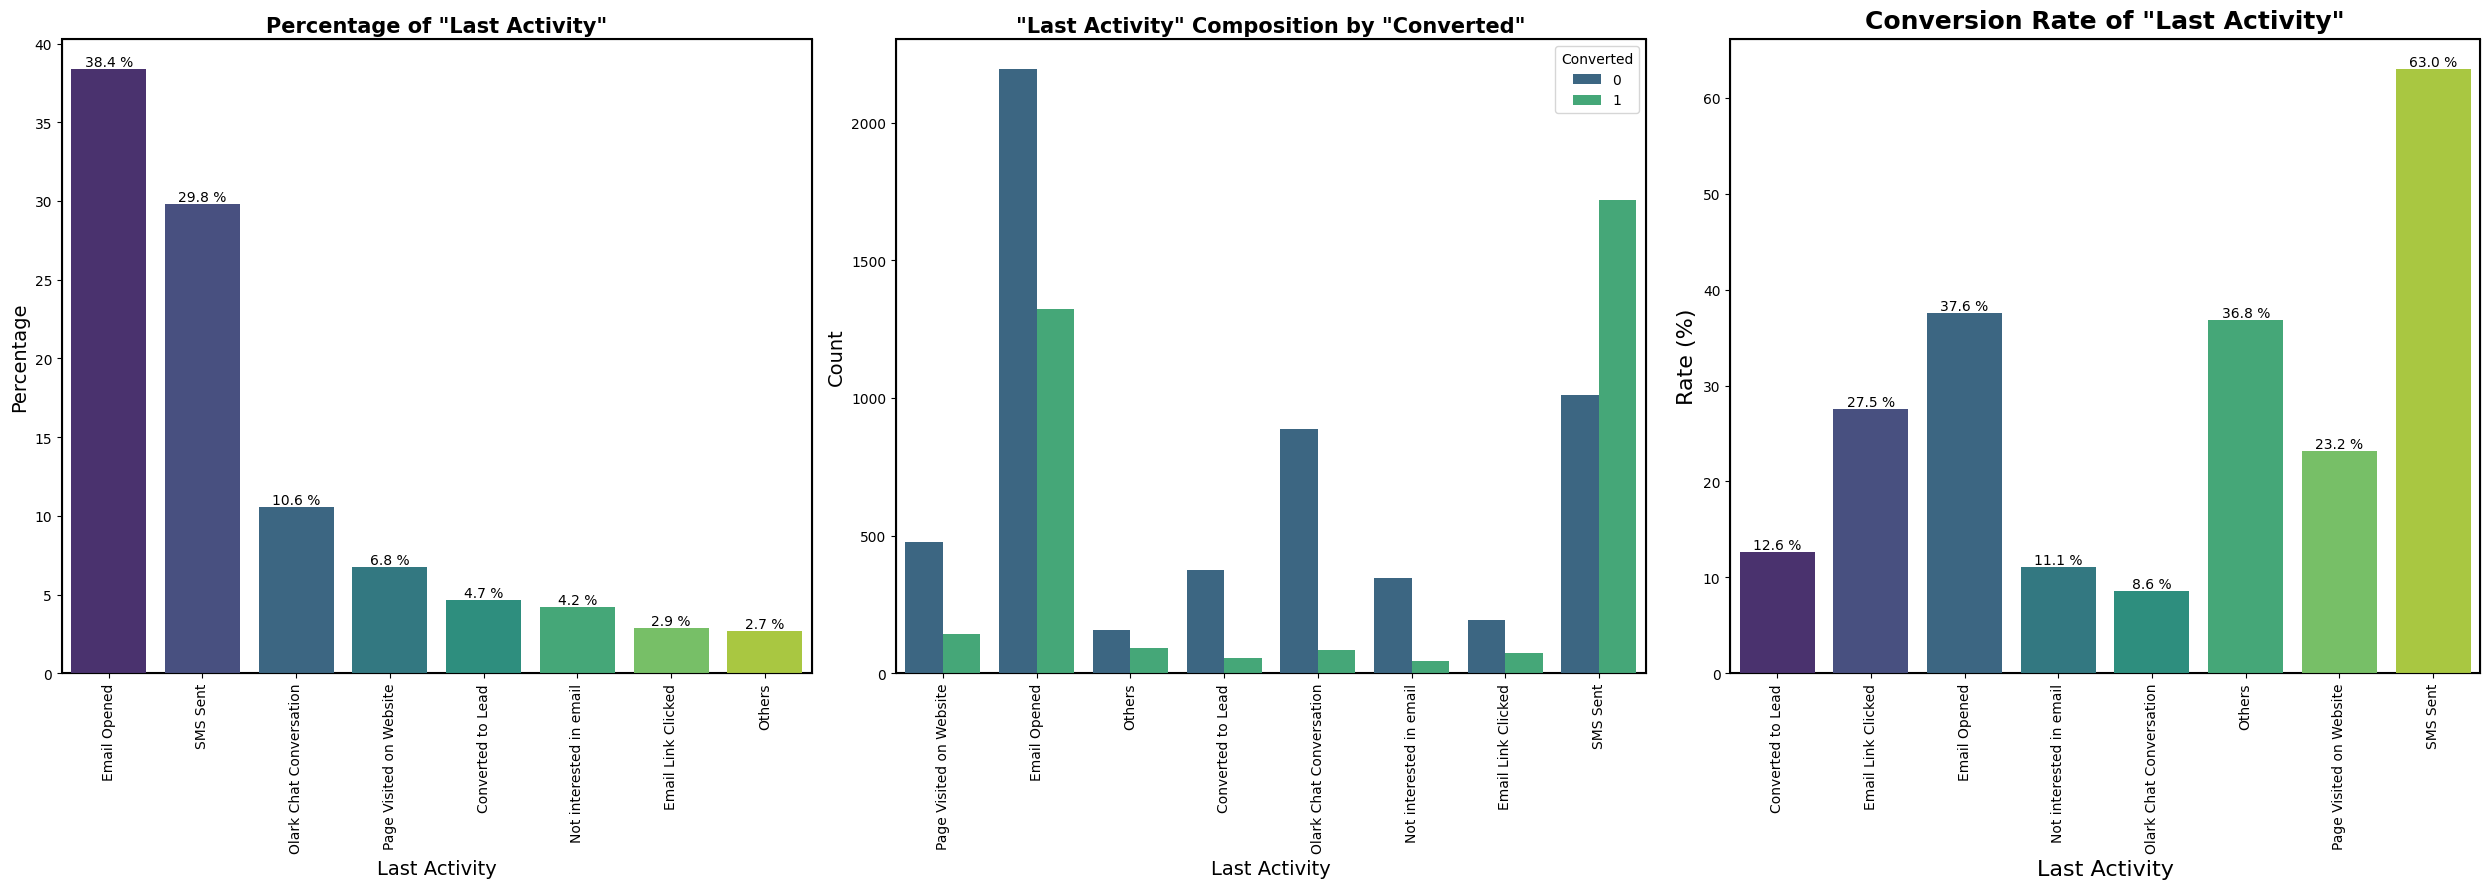

C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=p, ax=axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])
C:\Users\User\AppData\Local\Temp\ipykernel_28896\2042625185.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette=p, ci=None, ax=axes[2])


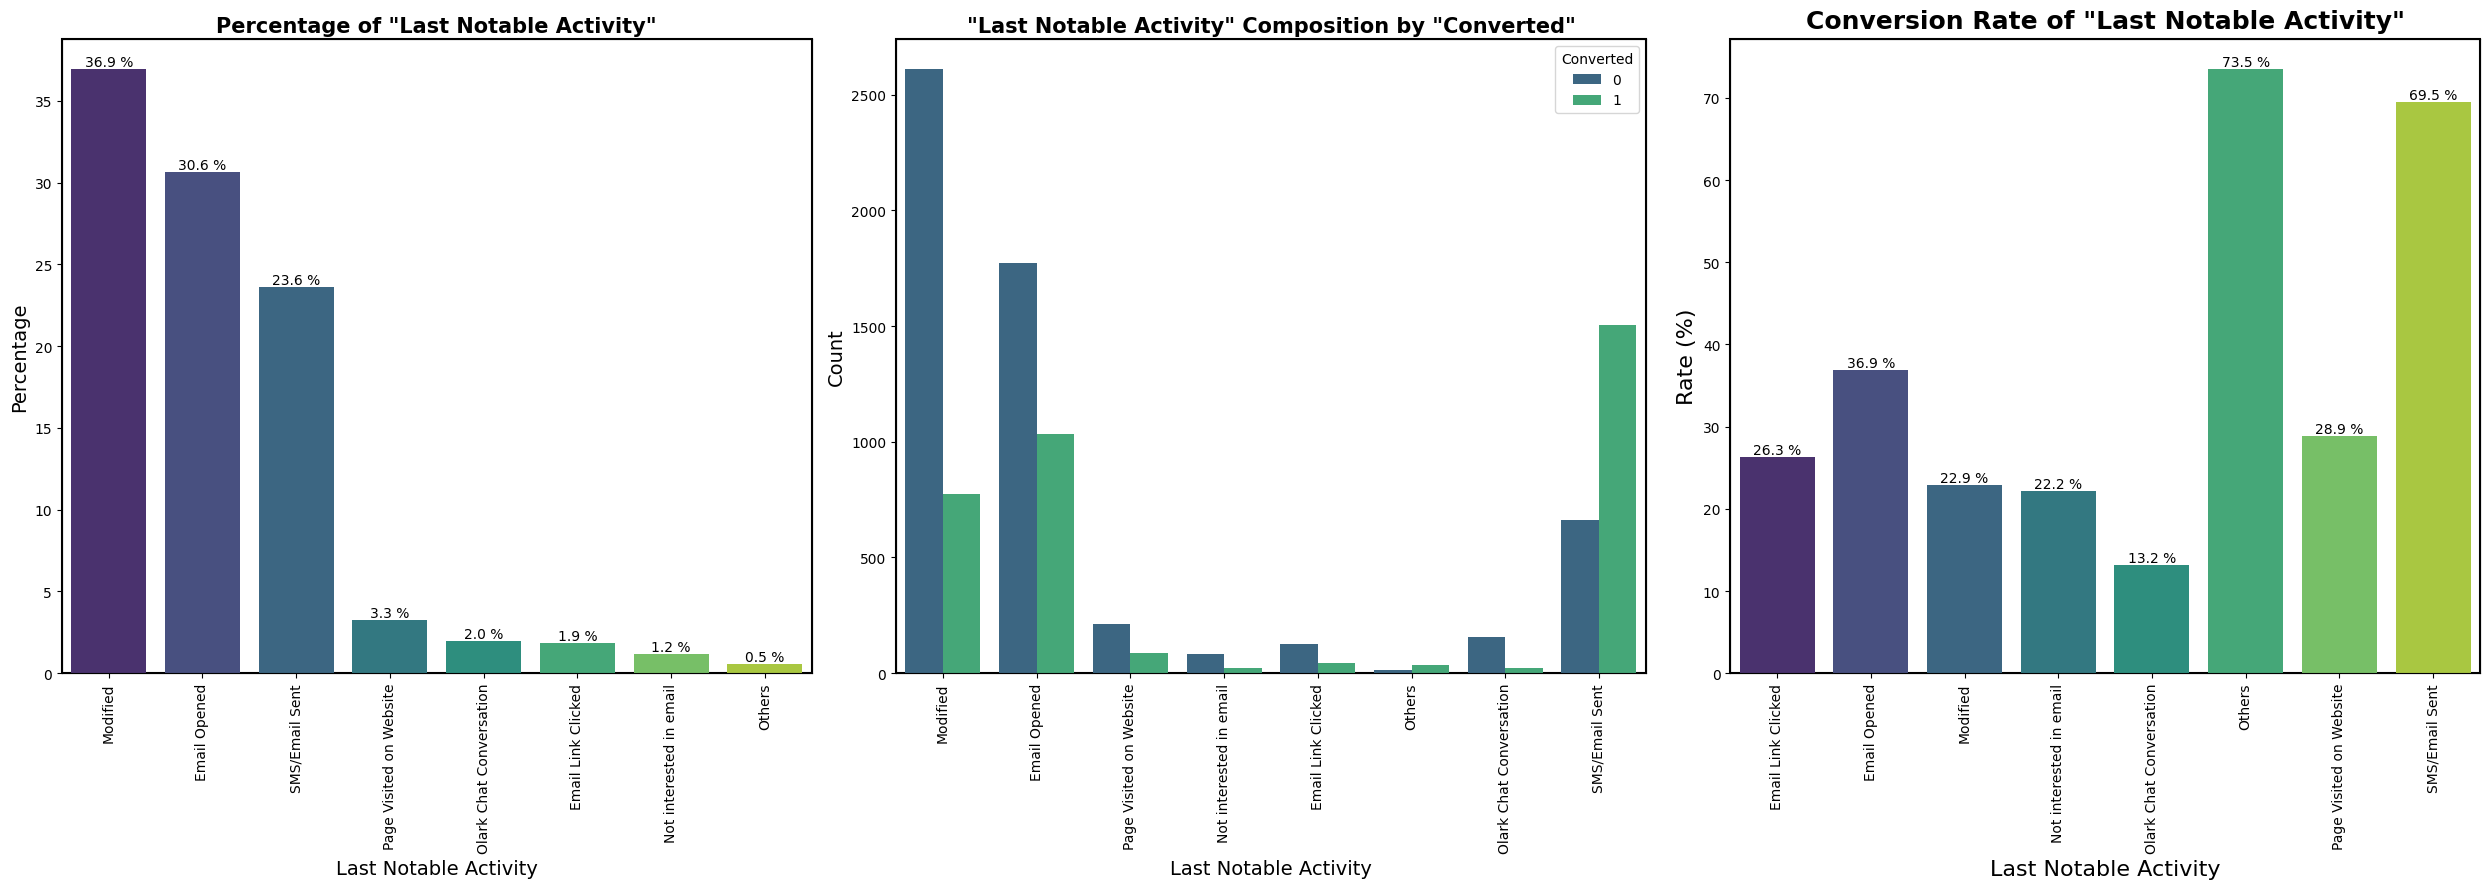

In [164]:
#Looping to  call visualization for each categorical variabel.
for x in cat_cols:
    visualize_variable(df, x, y='Converted')

#### Insight:
1. 'Do Not Email' : Selected by lead wherein they select whether of not they want to be called via email about the course or not.
- Majority of the leads (92.2%) did not opt ​​out of receiving emails while 7.8% opted out of receiving emails, which means most of the leads are still open to email marketing so email nurturing can still be done to increase conversions. Leads who did not choose "Do Not Email" or Leads who still want to receive emails converted higher (40.4%) than those who did (16.6%), which shows that email marketing can help push leads to the purchasing stage.

2. 'City': The city of the lead.
- Mumbai is the main source of leads as more than half of the total leads come from Mumbai (74.7%). However, the conversion rate is low (37.2%) compared to other cities, so we need to optimize our marketing strategy. Thane & Outskirts has a higher conversion rate (45.4%) so the marketing strategy must be more optimal and personal to optimize conversion, such as providing a referral program or using testimonials from them to increase the trust of leads in the city. 

3. 'Lead Origin': The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
- Landing Page Submission (52.7%) has the highest number of leads among API (38.9%), Lead Add Form (7.8%), and Lead Import (0.6%) but the conversion rate is low so it needs to be improved and the design of the CTA more effective. Leads from Lead Add Form are very high quality because almost all of them are converted (92.5% of the number of Lead Add Forms) even though they generate few leads so the company should try to generate more leads with this method.

4. 'Specialization': The industry domain in which the customer worked before.
- Finance (14.2%), Marketing (11.2%), and HR (9.2%) are sectors which have professionals attraction in this field. Finance (14.2%), Marketing (11.2%), and HR (9.2%) are sectors that attract professionals in this field. Based on conversion rate, lead from Marketing, Operation, Finance, HR, Supply Chain, and Business are more likely to convert at over 40%.

5. 'Tags': Tags assigned to customers indicating the current status of the lead.
- Leads with tags "Will revert after reading the email" with 22.5% of the total leads almost completely converted (96.8%) these tags should be given priority in follow-up. Leads  with tags, 'Not Connected', 'Not Contacted', 'Not Interested' have very low conversion rate. The company should spend less resources on people in this group. Although leads with the tags 'Not Eligible for the moment' (59.7%) have a hight conversion rate, they may not be able to take action now but can be contacted again later.

6. 'Last Activity': Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
- The majority of last activities are Email Opened (38.4%), SMS Sent (29.8%), and Olark Chat (10.6%). If we look at the number of conversion , the majority of Email Opened and Olark Chat are not converted. On the contrary, SMS Sent has a higher number of conversions compared to other activities. Lead who only visit the website and Olark Chat only have intial intent, but they need a stronger approach such as follow-up or retargeting to increase their chances of conversion.

7. 'What is your current occupation': Indicates whether the customer is a student, umemployed or employed.
- The majority of the leads are Unemployed (60.6%) followed by Other (29.3%), and Working Professional (7.7%), Student (2.3%), Housewife (0.1%), and Businessman (0.1%). However, although Unemployed has the largest number of leads, many of them do not convert so it has a conversion rate of 43.6%. In contrast to Housewife, Working Professional, and Businessman have a larger number of conversions with conversion rates of 100%, 91,6%, and 62.5% respectively which means that customers from this sector are more serious about purchasing services or products, but the data for housewives and businessmen are too small to make a confident inference. Student has a relatively small number of leads, but its conversion rate is quite high (37.1%), indicating that students are quite interested, a special pricing strategy or promotional package is needed to increase their conversion further.

8. 'Last Notable Activity': The last notable acitivity performed by the student.
- While Last Activity 'Modified' is the most common, its conversion rate is lower than other activities. SMS/Email Sent has a much higher chance of converting than other activities, indicating that more personal and direct communication is more effective in driving purchases. "Email Opened" has a fairly high conversion rate (36.9%), but it is still lower than customers who actually click on a link in the email (26.3%).

9. 'Lead Source': The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
- The majority of leads come from Google (31.6%) and Direct Traffic (27.5%) with conversion rates of 40.4% and 32.2%. Although their conversion rates are not as high as some other sources, they are still valuable because they are large in number and have a fairly good conversion rate so they can still be optimized further. Almost all lead sources from 'Reference' and 'Welingak Website' are converted but the number of leads is relatively small so it is necessary to have a strategy to increase traffic and expand referrals so that more quality prospects can be captured without reducing the high conversion rate.

10. 'A Free Copy of Mastering The Interview' : Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- More leads did not want (69%) a copy of 'Mastering The Interview' than those who did (31%) and those who converted were also relatively lower than those who wanted a copy of "Mastering The Interview". This suggests that giving away copies may not be effective in increasing sales because they may not be too interested in additional material or they already have sufficient insight into the topic.


## Numerical Variables

In [165]:
#Functions for boxplot visualizing of for numerical variables based on conversion rate.
def visualize_numeric(df, x, target='Converted', palette='viridis'):
    fig, ax = plt.subplots(figsize=(15, 6))

    #Create a boxplot.
    sns.boxplot(x=target, y=x, data=df, palette='deep', showfliers=True, showmeans=True,
                meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "crimson"})

    #Title and label.
    ax.set_title(f'Distribution of "{x}" by Conversion Rate', fontsize=15, fontweight='bold', pad=10)
    ax.set_xlabel(f'{target} (0=No, 1=Yes)', fontsize=14)
    ax.set_ylabel(x, fontsize=14)

    # Set borders for plot areas.
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28896\82822809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=x, data=df, palette='deep', showfliers=True, showmeans=True,


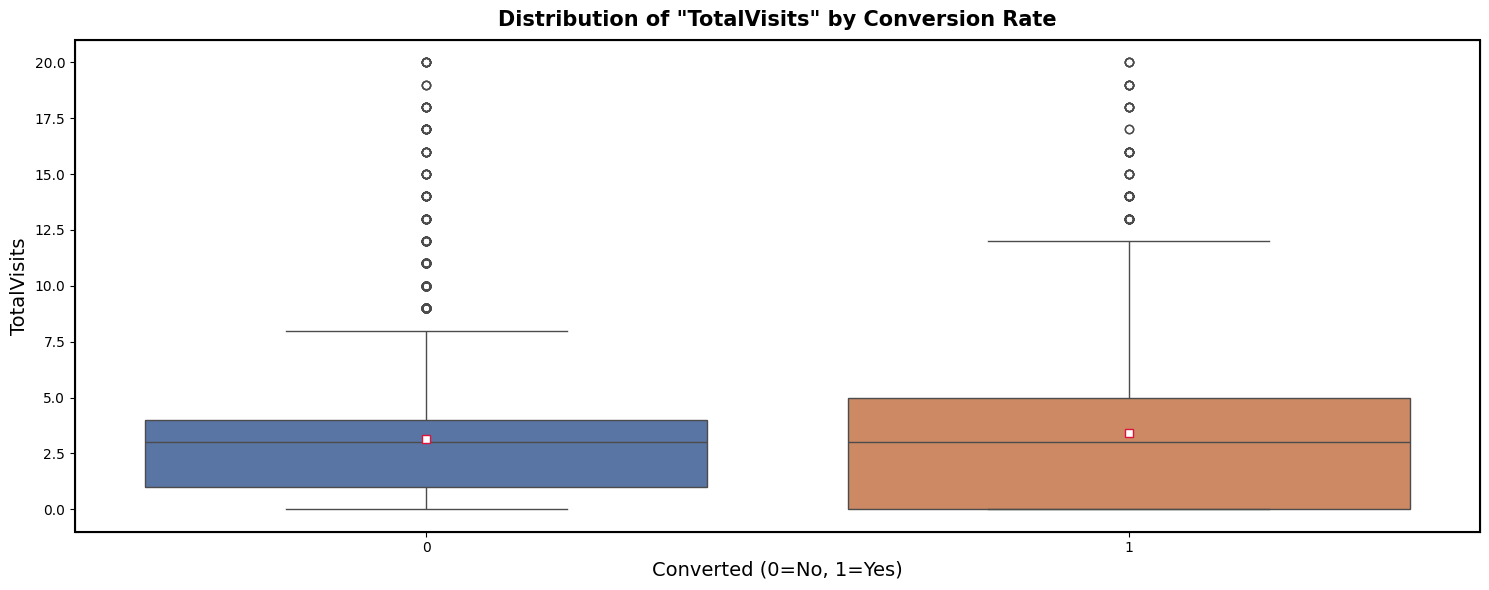

C:\Users\User\AppData\Local\Temp\ipykernel_28896\82822809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=x, data=df, palette='deep', showfliers=True, showmeans=True,


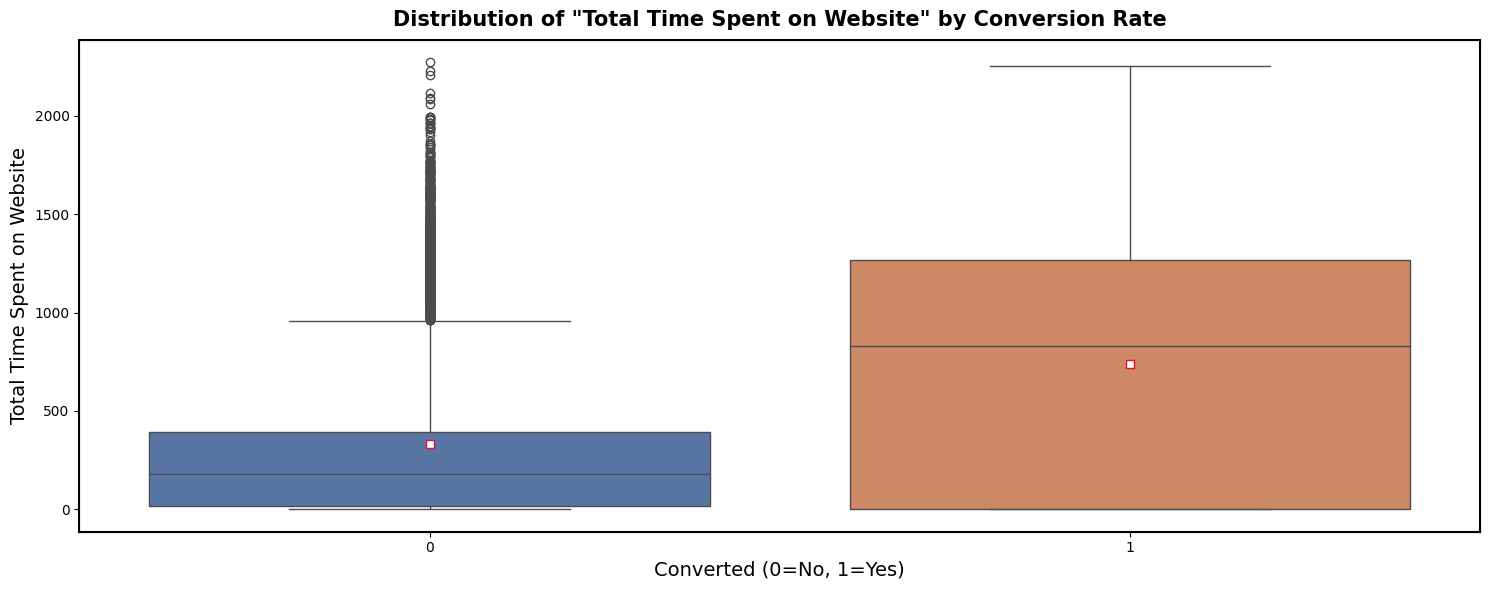

C:\Users\User\AppData\Local\Temp\ipykernel_28896\82822809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=x, data=df, palette='deep', showfliers=True, showmeans=True,


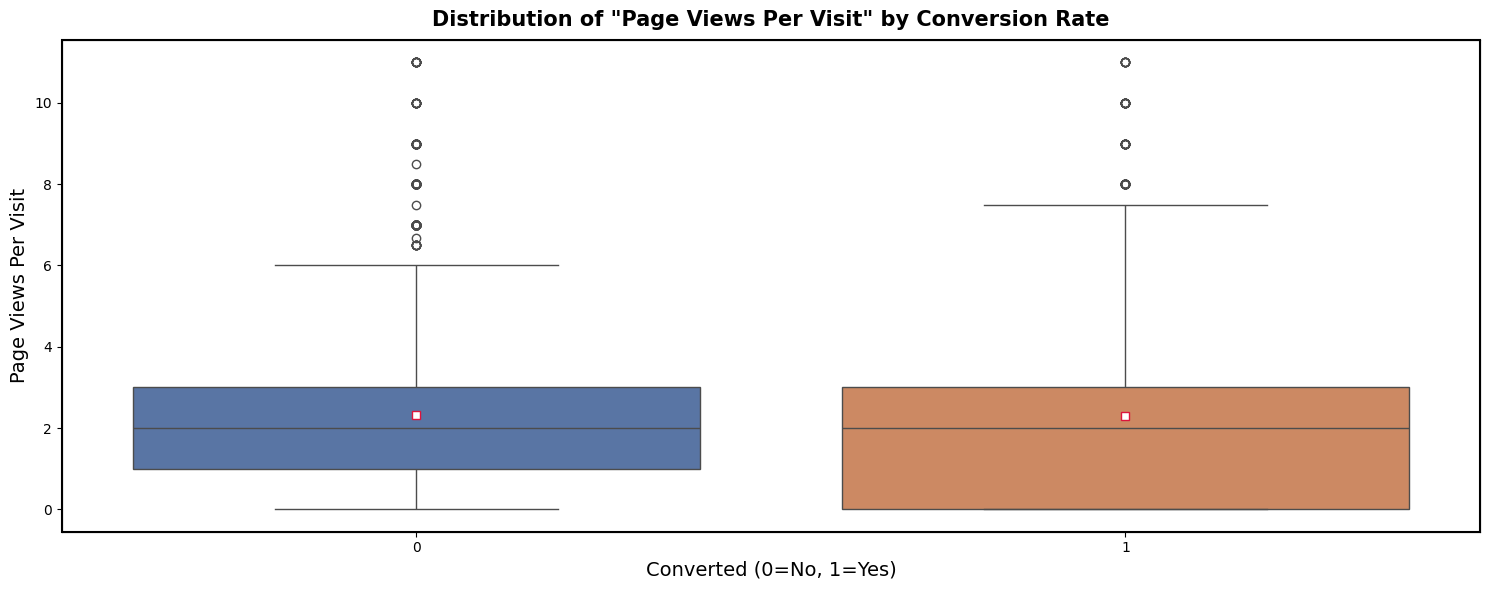

In [166]:
#Looping to  call visualization for each numerical variabel.
for x in num_cols:
    visualize_numeric(df, x, target='Converted')

#### Insight:

There's a significant difference in conversion rate among both groups.
Leads that convert more spent much more time on the website.

# Data Modeling

In [168]:
#Creating a copy of dataframe
leads_df = df.copy()

#### Action Plan:
Before modeling, we must perform one-hot-encoding on nominal categorical data because machine learning models can not directly understand text.

## One Hot Encoding

In [ ]:
#Define the map function Yes : 1 No : 0
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#Applying the function
leads_df[binary_cat_cols]= leads_df[binary_cat_cols].apply(binary_map)
leads_df.head()
leads_df.shape

In [ ]:
#Create a dummy variable beside binary_cat_cols and dropping one level (how to do dummy)
#1. Lead Origin
LO = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin').astype(int)
LO = LO.drop(['Lead Origin_Lead Import'], axis=1)
leads_df= pd.concat([leads_df, LO], axis=1)

#2. Lead Source
LS = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source').astype(int)
LS = LS.drop(['Lead Source_Others'], axis=1)
leads_df= pd.concat([leads_df, LS], axis=1)

#3. Last Activity
LA = pd.get_dummies(leads_df['Last Activity'], prefix = 'Last Activity').astype(int)
LA = LA.drop(['Last Activity_Others'], axis = 1)
leads_df = pd.concat([leads_df, LA], axis = 1)

# Specialization
SP = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization').astype(int)
SP = SP.drop(['Specialization_Others'], axis = 1)
leads_df = pd.concat([leads_df, SP], axis = 1)

# What is your current occupation
WO = pd.get_dummies(leads_df['What is your current occupation'], prefix = 'What is your current occupation').astype(int)
WO = WO.drop(['What is your current occupation_Other'], axis = 1)
leads_df = pd.concat([leads_df, WO], axis = 1)

# Tags
Tg = pd.get_dummies(leads_df['Tags'], prefix = 'Tags').astype(int)
Tg = Tg.drop(['Tags_Others'], axis = 1)
leads_df = pd.concat([leads_df, Tg], axis = 1)

# City
Ct = pd.get_dummies(leads_df['City'], prefix = 'City').astype(int)
Ct = Ct.drop(['City_Others'], axis = 1)
leads_df = pd.concat([leads_df, Ct], axis = 1)

# Last Notable Activity
LNA = pd.get_dummies(leads_df['Last Notable Activity'], prefix = 'Last Notable Activity').astype(int)
LNA = LNA.drop(['Last Notable Activity_Others'], axis = 1)
leads_df = pd.concat([leads_df, LNA], axis = 1)


In [173]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Will revert after reading the email,City_Mumbai,City_Thane & Outskirts,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Not interested in email,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS/Email Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,1,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,1,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Marketing Management,Unemployed,...,0,1,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,1,1,0,0,0,1,0,0,0,0


In [174]:
#Dropping old categorical columns because dummies have been created
cols = list(set(cat_cols) - set(binary_cat_cols))
leads_df.drop(cols, axis = 1, inplace = True)

# Train Test Split

An imbalanced class distribution occurs when the amount of data in one or omore classes is much greater (or less) than the other classes. If the dataset has an imbalanced class distribution (for example, the majority class is much greater than the minority class, Converted : 38.5% and Not Converted : 61.5%) then random data splitting can cause an imbalance in the train and test sets, where the majority class is more dominant in the resulting dataset. This can cause machine learning models to be biased, as they see more data from the majority class and are less trained to recognize patterns in the minority class.

For example, a dataset has 90% data for class 0 and 10% for class 1. If the 80/20 split is not stratified, then the test set will likely have an imbalanced class distribution meaning class 1 (the minority) can be very small or even absent in the test set. The consequence are:
- The test set may have almost all data from the majority class (0) → If the distribution is not maintained, the test set may have almost all class 0 and only a few or no class 1, resulting in inaccurate model evaluation.
- The model cannot learn well from the minority class (1) → Since most class 1 data may only be in the train set, the model will not be tested with enough minority data in the test set, resulting in poor performance when predicting class 1.
- The model may be biased towards the majority class → The model will predict the majority class (0) more often, and not be tested enough against the minority class, resulting in high accuracy but actually meaningless in balanced classification.

In [ ]:
#Define features X and Y
X = leads_df.drop('Converted', axis = 1)
y = leads_df['Converted']
print(leads_df.head())
print(leads_df.shape)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Converting Train dan Test to DataFrame
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [186]:
X_train.shape, X_test.shape

((7333, 52), (1834, 52))

for numerical variables will be scalling

In [187]:
#defining scaler
scaler = StandardScaler()

#fitting scaler and transforming X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#transforming X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

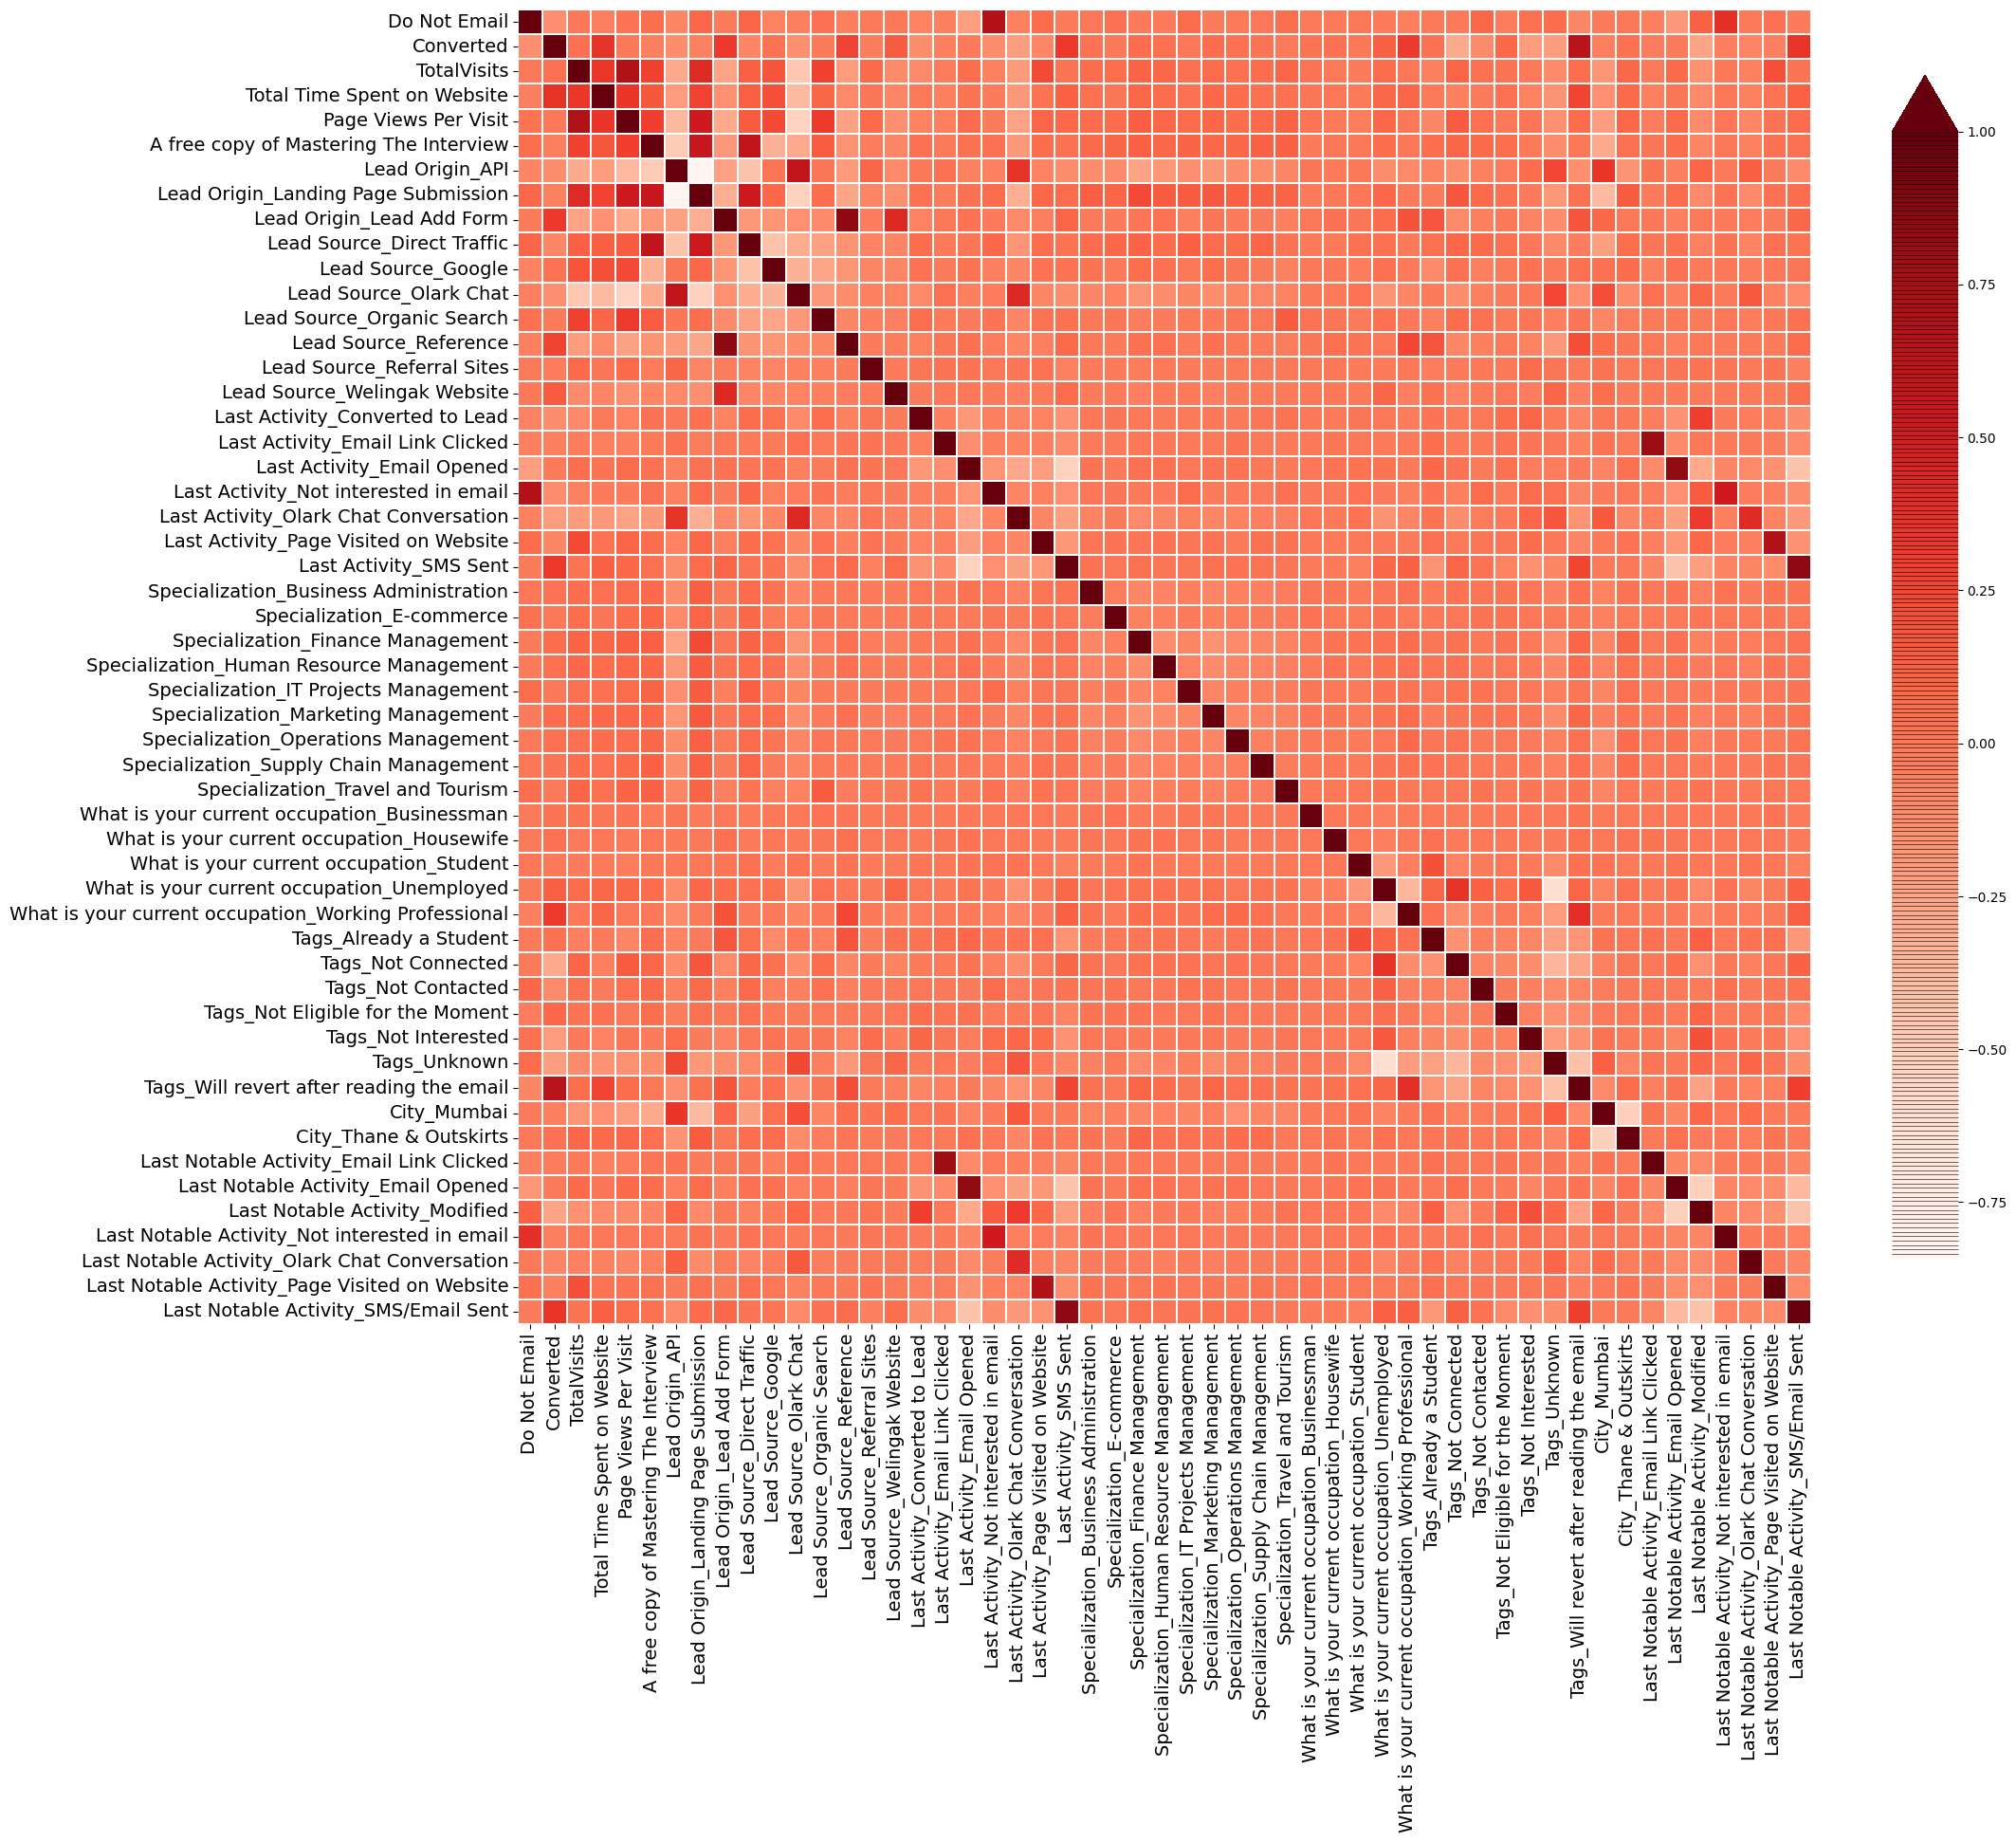

In [188]:
#Correlation matrix
plt.figure(figsize = [22,18])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(leads_df.corr(), annot = False, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [189]:
# Use stratified fold for ensure that we shuffle the dataset and conserve classes
skfold = StratifiedKFold(5, shuffle=True, random_state=42)
#Display function score of models
def display_scores(model,scores,pred):
  print(f'----------- {model} -----------')
  print('')
  print("------------------ Cross validation scores:")
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
  print('')
  print("--------------- Scores in the training set:")
  print("Precision:", precision_score(y_train,pred))
  print("Recall:", recall_score(y_train,pred))
  print("F1 score:", f1_score(y_train,pred))
  print("ROC - AUC score:", roc_auc_score(y_train,pred))


# 1. Logistic Regression

In [190]:
# 1. Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=skfold, scoring='f1')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_train)
#Display Scores
display_scores('Logistic Regression', lr_scores, lr_pred)


----------- Logistic Regression -----------

------------------ Cross validation scores:
Scores: [0.85950413 0.84761905 0.86956522 0.88589398 0.86940639]
Mean: 0.8663977540338846
Standard deviation: 0.012643966172913992

--------------- Scores in the training set:
Precision: 0.9049242424242424
Recall: 0.8456637168141593
F1 score: 0.8742909423604758
ROC - AUC score: 0.894992461778863


## 1a. Hyperparameter Tuning for Logistic Regression

In [74]:
lr_params = {
    'C': uniform(loc=0, scale=4),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

lr_randomcv = RandomizedSearchCV(lr, lr_params, cv=skfold, scoring='f1', n_iter=50, random_state=10)
lr_randomcv.fit(X_train, y_train)

print("Best Parameters - Logistic Regression:", lr_randomcv.best_params_)
print("Best Score - Logistic Regression:", lr_randomcv.best_score_)

c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best Parameters - Logistic Regression: {'C': np.float64(0.2570042427792978), 'penalty': 'l1', 'solver': 'saga'}
Best Score - Logistic Regression: 0.8679910892238489


c:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 2. Support Vector Machine

In [191]:
# 2. Support Vector Machine (SVM)
svc = SVC(probability=True)  # Enable probability predictions for scoring
svc_scores = cross_val_score(svc, X_train, y_train, cv=skfold, scoring='f1')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_train)

display_scores('Support Vector Machine', svc_scores, svc_pred)


----------- Support Vector Machine -----------

------------------ Cross validation scores:
Scores: [0.88642659 0.87276155 0.89152233 0.91090909 0.89680365]
Mean: 0.8916846432047393
Standard deviation: 0.012502325445348234

--------------- Scores in the training set:
Precision: 0.9416030534351145
Recall: 0.8732743362831858
F1 score: 0.9061524334251607
ROC - AUC score: 0.9196673367307677


## 2a. Hyperparameter Tuning For SVM

In [76]:
svc_params = {
    'C': uniform(loc=0, scale=4),  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

svc_randomcv = RandomizedSearchCV(svc, svc_params, cv=skfold, scoring='f1', n_iter=50, random_state=10)
svc_randomcv.fit(X_train, y_train)

print("Best Parameters - SVM:", svc_randomcv.best_params_)
print("Best Score - SVM:", svc_randomcv.best_score_)

Best Parameters - SVM: {'C': np.float64(3.250483846608454), 'gamma': 'scale', 'kernel': 'rbf'}
Best Score - SVM: 0.8938036443035235


# 3. Random Forest

In [198]:
# 3. Random Forest
rf = RandomForestClassifier(random_state=10, oob_score=True)
rf_scores = cross_val_score(rf, X_train, y_train, cv=skfold, scoring='f1')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)

display_scores('Random Forest', rf_scores, rf_pred)

----------- Random Forest -----------

------------------ Cross validation scores:
Scores: [0.88563586 0.86753731 0.87716106 0.90252708 0.89449955]
Mean: 0.8854721716972701
Standard deviation: 0.012354140088384438

--------------- Scores in the training set:
Precision: 0.9868980169971672
Recall: 0.9865486725663717
F1 score: 0.9867233138608603
ROC - AUC score: 0.9891705208439667


Random Forest mengalami indikasi overfitting karena memiliki precision dan F1 score yang tinggi sehingga perlu di cek apakah model ini overfit.

Langkah Selanjutnya:
📌 Lakukan pengecekan overfitting pada Random Forest dengan cara membandingkan metrik evaluasi pada data train vs data test.

In [199]:
# Evaluasi pada Train Set
display_scores('Train Random Forest',rf_scores, rf_pred)
# Evaluasi pada Test Set
rf_test_pred = rf.predict(X_test)
print("\nTest Precision:", precision_score(y_test, rf_test_pred))
print("Test Recall:", recall_score(y_test, rf_test_pred))
print("Test F1 Score:", f1_score(y_test, rf_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, rf_test_pred))

----------- Train Random Forest -----------

------------------ Cross validation scores:
Scores: [0.88563586 0.86753731 0.87716106 0.90252708 0.89449955]
Mean: 0.8854721716972701
Standard deviation: 0.012354140088384438

--------------- Scores in the training set:
Precision: 0.9868980169971672
Recall: 0.9865486725663717
F1 score: 0.9867233138608603
ROC - AUC score: 0.9891705208439667

Test Precision: 0.9261447562776958
Test Recall: 0.8881019830028328
Test F1 Score: 0.9067245119305857
Test ROC-AUC: 0.9218878709340405


Evaluasi metrik dari model Random Forest memiliki selisih antara train dan test dibawah 10% yang artinya model ini masih dapat diterima.
 
Langkah Selanjutnya:
📌 Lakukan Hyperparameter Tuning Random Forest → Untuk melihat apakah performa meningkat dan overfitting pada Random Forest bisa dikurangi.


## 3a. Hyperparameter Tuning for Random Forest

In [200]:
rf_params = {
    'n_estimators': [50, 100, 200],  # Jumlah trees dalam forest
    'max_depth': [2, 5, 10, 15, None],  # Kedalaman maksimal trees
    'criterion': ['gini', 'entropy'],  # Algoritma pemisahan
    'max_features': ['sqrt', 'log2', None]  # Fitur maksimum yang dipilih per tree
}

rf_randomcv = RandomizedSearchCV(rf, rf_params, cv=skfold, scoring='f1', n_iter=50, random_state=10)
rf_randomcv.fit(X_train, y_train)

print("Best Parameters - Random Forest:", rf_randomcv.best_params_)
print("Best Score - Random Forest:", rf_randomcv.best_score_)

Best Parameters - Random Forest: {'n_estimators': 200, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best Score - Random Forest: 0.8919663038428413


# 4. Gradient Boosting

In [193]:
# 4. Gradient Boosting
xg = GradientBoostingClassifier(random_state=11)
xg_scores = cross_val_score(xg, X_train, y_train, cv=skfold, scoring='f1')
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_train)

display_scores('Gradient Boosting', xg_scores, xg_pred)

----------- Gradient Boosting -----------

------------------ Cross validation scores:
Scores: [0.88515406 0.86203616 0.88207985 0.90493601 0.8969918 ]
Mean: 0.8862395759075344
Standard deviation: 0.014625007593778008

--------------- Scores in the training set:
Precision: 0.9384735202492211
Recall: 0.8530973451327434
F1 score: 0.8937511589096978
ROC - AUC score: 0.9090242715015979


## 4a. Hyperparameter Tuning for Gradient Boosting

In [83]:
xg_params = {
    'n_estimators': np.arange(50,300,50),  # Jumlah boosting iterations
    'loss': ['exponential','log_loss'],
    'learning_rate': uniform(loc=0, scale=0.5),  # Learning rate
    'max_depth': np.arange(2,14,2),  # Kedalaman pohon
    'criterion': ['friedman_mse', 'squared_error'],  # Algoritma loss
    'max_features': ['sqrt', 'log2', None]  # Fitur maksimum yang dipilih per tree
}

xg_randomcv = RandomizedSearchCV(xg, xg_params, cv=skfold, scoring='f1', n_iter=50, random_state=10)
xg_randomcv.fit(X_train, y_train)

print("Best Parameters - Gradient Boosting:", xg_randomcv.best_params_)
print("Best Score - Gradient Boosting:", xg_randomcv.best_score_)

Best Parameters - Gradient Boosting: {'criterion': 'friedman_mse', 'learning_rate': np.float64(0.05699218093177488), 'loss': 'log_loss', 'max_depth': np.int64(4), 'max_features': None, 'n_estimators': np.int64(200)}
Best Score - Gradient Boosting: 0.8965418561058176


# Text

#### Action Plan:
- Determine the best model based on tuning results.
- Use best model to see Feature Importance.


Why is feature importance done after selecting the best model? 

If done after the best model is selected, we can see how the features contribute to the predictions specifically for the model that will be used in lead scoring.

# Evaluation metrics and select the best models

In [194]:
# Model sebelum tuning
models = {
    "Logistic Regression": lr,
    "SVM": svc,
    "Random Forest": rf,
    "Gradient Boosting": xg
}

# Evaluasi sebelum tuning untuk train dan test
results_before_tuning = []

for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    results_before_tuning.append([
        name,
        precision_score(y_train, train_pred),
        precision_score(y_test, test_pred),
        recall_score(y_train, train_pred),
        recall_score(y_test, test_pred),
        f1_score(y_train, train_pred),
        f1_score(y_test, test_pred),
        roc_auc_score(y_train, train_pred),
        roc_auc_score(y_test, test_pred)
    ])

# Membuat DataFrame hasil evaluasi sebelum tuning
df_before_tuning = pd.DataFrame(
    results_before_tuning, 
    columns=["Model", "Train Precision", "Test Precision", "Train Recall", "Test Recall",
             "Train F1 Score", "Test F1 Score", "Train ROC-AUC", "Test ROC-AUC"]
)

print("Evaluasi Model Sebelum Tuning:")
print(df_before_tuning)

Evaluasi Model Sebelum Tuning:
                 Model  Train Precision  Test Precision  Train Recall  \
0  Logistic Regression         0.904924        0.917910      0.845664   
1                  SVM         0.941603        0.926975      0.873274   
2        Random Forest         0.986898        0.926145      0.986549   
3    Gradient Boosting         0.938474        0.930931      0.853097   

   Test Recall  Train F1 Score  Test F1 Score  Train ROC-AUC  Test ROC-AUC  
0     0.871105        0.874291       0.893895       0.894992      0.911173  
1     0.881020        0.906152       0.903413       0.919667      0.918790  
2     0.888102        0.986723       0.906725       0.989171      0.921888  
3     0.878187        0.893751       0.903790       0.909024      0.918703  


In [85]:
# Model setelah tuning
tuned_models = {
    "Logistic Regression Tuned": lr_randomcv.best_estimator_,
    "SVM Tuned": svc_randomcv.best_estimator_,
    "Random Forest Tuned": rf_randomcv.best_estimator_,
    "Gradient Boosting Tuned": xg_randomcv.best_estimator_,
}

# Evaluasi setelah tuning untuk train dan test
results_after_tuning = []

for name, model in tuned_models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    results_after_tuning.append([
        name,
        precision_score(y_train, train_pred),
        precision_score(y_test, test_pred),
        recall_score(y_train, train_pred),
        recall_score(y_test, test_pred),
        f1_score(y_train, train_pred),
        f1_score(y_test, test_pred),
        roc_auc_score(y_train, train_pred),
        roc_auc_score(y_test, test_pred)
    ])

# Membuat DataFrame hasil evaluasi setelah tuning
df_after_tuning = pd.DataFrame(
    results_after_tuning, 
    columns=["Model", "Train Precision", "Test Precision", "Train Recall", "Test Recall",
             "Train F1 Score", "Test F1 Score", "Train ROC-AUC", "Test ROC-AUC"]
)

print("\nEvaluasi Model Setelah Tuning:")
print(df_after_tuning)


Evaluasi Model Setelah Tuning:
                       Model  Train Precision  Test Precision  Train Recall  \
0  Logistic Regression Tuned         0.906428        0.916168      0.843540   
1                  SVM Tuned         0.948747        0.920705      0.897699   
2        Random Forest Tuned         0.957301        0.928994      0.888850   
3    Gradient Boosting Tuned         0.940232        0.922173      0.890973   

   Test Recall  Train F1 Score  Test F1 Score  Train ROC-AUC  Test ROC-AUC  
0     0.866856        0.873854       0.890830       0.894485      0.908605  
1     0.888102        0.922517       0.904110       0.933654      0.920115  
2     0.889518        0.921806       0.908828       0.932002      0.923483  
3     0.889518        0.914940       0.905552       0.927740      0.921266  


#### Insight:
- After performing hyperparameter tuning on the Random Forest model, it can be seen that the overall metric evaluation results are <5%, which means that the Random Forest model is not overfitting. In addition, this difference is reduced from 95.73% to 92.89% which means that tuning successfully reduced overfitting.
- All the four models performed very well. The Tuned Random Forest model obtained the highest precision score. 

#### At this point, we have already:
- Have done preprocessing and data exploration.
- Have done trials to get the best results using 4 models with or without tuning hyperparameters. Based on the trial, the best results were obtainned using Random Forest Tuning which will use for further analysis. 
- Next, we select feature importance and make lead scoring predictions.

# The best model and Feature Importance

In [86]:
print("Best Parameters - Random Forest:", rf_randomcv.best_params_)

Best Parameters - Random Forest: {'n_estimators': 200, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}


In [87]:
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_randomcv.best_estimator_.feature_importances_
})
# Menampilkan seluruh DataFrame tanpa pemotongan output
pd.set_option('display.max_rows', None)
feature_importance_rf.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance - Random Forest Tuned:\n", feature_importance_rf)

Feature Importance - Random Forest Tuned:
                                               Feature  Importance
42           Tags_Will revert after reading the email    0.431511
2                         Total Time Spent on Website    0.132706
7                           Lead Origin_Lead Add Form    0.091594
41                                       Tags_Unknown    0.044058
51               Last Notable Activity_SMS/Email Sent    0.037460
34         What is your current occupation_Unemployed    0.027543
37                                 Tags_Not Connected    0.027263
3                                Page Views Per Visit    0.027143
39                   Tags_Not Eligible for the Moment    0.024906
1                                         TotalVisits    0.023004
36                             Tags_Already a Student    0.015142
21                             Last Activity_SMS Sent    0.015061
40                                Tags_Not Interested    0.011311
17                         Last A

#### Insight:
- Email communication and total time spent on website are the main factors in lead conversion.
- SMS interaction and lead add form also play a role.
- Some attributes such as referral source or employment status do not have much impact on conversion.
- These results can be used to improve marketing strategies by focusing more on leads with email interaction, time on website, and SMS engagement.

# Make predicitons and Lead Scoring

In [202]:
#Prediction and scoring on test set and create a new column as the result
#lead_scoring = (rf_randomcv.predict_proba(X_test)[:, 1]* 100).round(2)
leads_df.loc[X_test.index, 'Lead Score'] = (rf_randomcv.predict_proba(X_test)[:, 1]* 100).round(2) #as a lead scoring
#lead_prediction = rf_randomcv.predict(X_test)
leads_df.loc[X_test.index, 'Convert Prediction'] = rf_randomcv.predict(X_test) #as a lead prediction

In [209]:
pd.set_option('display.max_columns', None)

In [ ]:
#Show target variable (y = Converted) in original data, predicted data, and scoring.
leads_df[['Converted','Lead Score', 'Convert Prediction']].head(26)

,Converted,Lead Score,Convert Prediction
0,0,0.48,0.0
1,0,10.65,0.0
2,1,99.99,1.0
3,0,1.31,0.0
4,1,99.99,1.0
5,0,1.18,0.0
6,1,99.97,1.0
7,0,1.18,0.0
8,0,1.99,0.0
9,0,2.03,0.0


In [ ]:
#Scoring on train data
leads_df.loc[X_train.index, 'Lead Score'] = (rf_randomcv.predict_proba(X_train)[:, 1]*100).round(2)
leads_df.loc[X_train.index, 'Convert Prediction'] = rf_randomcv.predict(X_train)

#### Insight:
This output shows the conversion prediction results using Tuned Random Forest on the test data set. There are three main columns:
1. Converted → The original value of y_test, whether the lead actually converted (1) or not (0).
2. Convert_pred → The prediction from the Tuned Random Forest model, whether the model predicted the lead converted (1) or not (0).
3. Lead Score → The probability (%) that the lead will convert, based on predict_proba().

#### Insight:

- Lead 1 has a lead score of 0.48% and the model predicts that the lead will not convert (Convert_pred = 0), consistent with the original value Converted = 0 -> True Negative prediction.
- Lead 26 has a lead score of 26.02% and the model predicts that the lead will not convert (Convert_pred = 0), but the original value shows Converted = 1 -> Model incorrectly predicted (False Negative).
- Lead 3 has a Lead Score = 99.99%, and the model predicts that the lead will convert (Convert_pred = 1) consistent with the original value (Converted = 1) → True Positive prediction.

## Let's plot the confussion matrix

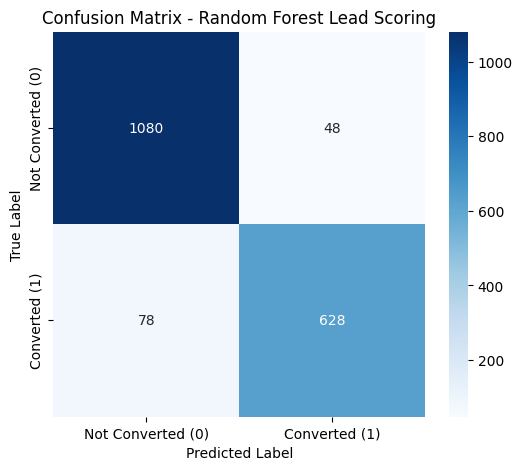

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, leads_df.loc[X_test.index, 'Convert Prediction'])

# Menampilkan Confusion Matrix dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Converted (0)", "Converted (1)"], yticklabels=["Not Converted (0)", "Converted (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Lead Scoring")
plt.show()

#### Interpretation

📌 True Positives (628) → Leads that actually converted and were predicted correctly.

📌 True Negatives (1080) → Leads that actually did not convert and were predicted correctly.

📌 False Positives (48) → Leads that actually did not convert, but were predicted as Converted → Can lead to wasted marketing resources.

📌 False Negatives (78) → Leads that actually converted, but were predicted as Not Converted → Can lead to lost business opportunities!


# Klasifikasikan Lead Scoring

In [ ]:
#Add lead categories to facilities sales team analysis
leads_df['Lead Category'] = pd.cut(leads_df['Lead Score'], bins=[0, 25, 50, 75, 100], labels=['Awareness', 'Interest', 'Consideration', 'Decision'])

#### Insight:
Leads are then categorized by their conversion probability score (Lead Score) based on their behavior on the website and other interactions.

Lead Score Categories:
- 1-25% (Awareness) → New to 'Education', still looking for information. Less likely to convert, needs another strategy. Can be included in awareness or retargeting campaigns.
- 25-50% (Interest) → Starting to get interested and maybe check out some courses. Needs further nurturing with emails or educational content.
- 50-75% (Consideration) → Fills out a form, asks about pricing, or shows higher intent.
- 75-100% (Decision) → Ready to buy a course, just needs that final push.

#### Suggestion:

1. High-scoring leads should be contacted immediately by the sales team to increase the chances of conversion.
2. Provide discounts or special offers for the highest-scoring leads.
3. Use retargeting ads for low-scoring leads to keep them engaged.
4. Input lead scoring data into Customer Relationship Management (CRM) to make it easier for the sales team to follow up on prospects.

In [ ]:
#Show Lead Score and Lead Category whose score is 49-50
print(leads_df[(leads_df['Lead Score'] >= 49) & (leads_df['Lead Score'] <= 51)][['Lead Score', 'Lead Category']])

      Lead Score  Lead Category
708        50.85  Consideration
833        50.20  Consideration
2434       49.46       Interest
2875       50.11  Consideration
3383       49.21       Interest
3488       50.21  Consideration
3586       50.88  Consideration
3870       49.66       Interest
4145       50.41  Consideration
4166       49.27       Interest
5104       50.79  Consideration
5194       49.47       Interest
6315       49.31       Interest
6381       50.81  Consideration
6928       50.48  Consideration
6939       49.09       Interest
6962       50.35  Consideration
7687       49.34       Interest
8189       50.86  Consideration
8757       49.83       Interest


# Conclusion

## Data Findings:
1. Based on Feature Importance from the Tuned Random Forest model, the 3 factors that most determine conversion are:
- Tags_Will revert after reading the email (0.431511) → Response to email is the main factor in determining whether a lead will convert.
- Total Time Spent on Website (0.132706) → Leads who spend more time on the website have a higher probability of converting.
- Lead Origin_Lead Add Form (0.091594) → Leads from this form are more likely to become customers than leads from other sources.

2. Based on the analysis of the conversion rate distribution, several customer behavior patterns were found:
- Leads who explicitly respond to emails are more likely to become customers → They show high engagement with the company and are more active in communication.
- Leads with a long visit time on the website are more likely to convert → This shows that the longer customers explore information, the more likely they are to make a purchase.
- Leads who last interacted via SMS have a high conversion rate → This shows that the SMS follow-up strategy is more effective than just using email or retargeting ads.

3. Based on the evaluation of the distribution of conversion rates and correlations between features, it was found that several attributes have a major impact on conversion opportunities:
1) Lead source has a significant impact →
- Leads from Reference have a conversion rate of 91.7%, but the number is still low.
- Leads from Welingak Website also have a high conversion rate (98.6%), but just like Reference, the number is not much.
- Leads from Google have the largest number but a lower conversion rate (40.4%).
2) The duration of the visit is related to the conversion rate → The longer the leads stay on the website, the higher the probability of them converting into customers.
3) Page Views Per Visit has a smaller effect on conversion, but still shows that leads who view more pages tend to have a higher interest in the product.

The source of the lead, duration of the visit, and engagement with the website have a significant impact on the chances of customer conversion. Focusing on high-quality lead sources and improving website engagement strategies can increase conversions.

4. Evaluating the Machine Learning model, we found that Random Forest Tuned has the best accuracy in predicting customer conversions with ROC-AUC and F1 of 92.34% and 90.88%. We have achieved a precision target of more than 80%, which is 92.89% of the 30% conversion rate.

5. From the results of the Lead Score model evaluation and segmentation, some of the best strategies for the sales team are:
1) Use the Lead Score category as a basis for determining customer approach strategies:
- Awareness (1-25%) → Focus on retargeting and education, because they are still in the information seeking stage.
- Interest (25-50%) → Send nurturing emails with course information and customer testimonials to increase engagement.
- Consideration (50-75%) → Provide discounts or interactive webinars to accelerate their decisions.
- Decision (75-100%) → Use urgency strategy (limited promo, direct follow-up from sales team) to increase conversion.
2) Strengthen communication via SMS, because it has been proven to have a higher conversion rate compared to just using email or website.
3) Optimize lead sources that have high conversion rates such as Reference and Welingak Website with a more aggressive marketing strategy. 

## Conlusions:
1. EDA and prediction models have given accurate answares to the main key questions.
2. The biggest factors in lead conversion are email interaction, website visit duration, and high-quality lead sources.
3. Lead with high engagement in communication (email or SMS) have a higher chance of conversion than leads who only view information without further action.
4. The lead scoring model has provided a pretty accurate conversion probability score, allowing the sales team to be more focused in their approach.
5. Lead Score segmentation-based strategies and more intense communication via SMS and direct follow-ups from the sales team have proven effective in increasing customer conversions.

🔥 By implementing this data-based strategy, companies can increase conversion rates from 30% to a target of 80%, as well as increase business profitability!


## Implications:
1. Companies need to optimize their email marketing strategy because it has a big impact on customer decisions.
2. Lead sources from Reference and Welingak Website need to be improved with SEO strategies, referral programs, and targeted advertising.
3. Direct communication strategies via SMS need to be strengthened, because they have proven to be more effective in increasing conversions.
4. Leads who only view website pages without further interaction need to be targeted with retargeting campaigns to enter the next stage.
5. Using Lead Category segmentation allows the sales team to be more efficient in approaching customers, with communication strategies that are tailored based on their readiness to buy.
6. Companies can implement personalized marketing for each category, so that campaigns are more targeted and conversions are more optimal.

# Download Data to Excel

In [ ]:
#Save DataFrame to Excel
leads_df.to_excel("Theresult leads_dummy data.xlsx", index=False)
#Save DataFrame original (before encoding) and result to Excel
df.to_excel("Theresult and original leads.xdflsx", index=False)